# TUIA - Aprendizaje Autom√°tico 1

## Trabajo pr√°ctico N¬∞2: Predicci√≥n de lluvia en Australia

Integrantes:
- Moresco, Brisa
- Brizuela Cipolletti, Sof√≠a

In [ ]:
!pip install shap
!pip install optuna
!pip install pandas==2.1.1 matplotlib==3.8.0 scipy==1.14.0
!pip install geopy
!pip install plotly



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.6/7.6 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 44.7/44.7 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\brisa\\OneDrive\\Desktop\\aa1-tp2-2025\\tf-env\\Lib\\site-packages\\~cipy.libs\\libopenblas_v0.3.20-571-g3dec11c6-gcc_10_3_0-c2315440d6b6cef5037bad648efc8c59.dll'
Check the permissions.


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import loguniform
from pycaret.classification import *
from imblearn.combine import SMOTETomek
from geopy.geocoders import Nominatim
import optuna
#import shap
import seaborn as sns

from time import sleep

# Creaci√≥n de clusters


In [ ]:
#https://drive.google.com/file/d/1Sii6XCuwZ_Qvkb9DBk_6OV59H2wPHilQ/view?usp=drive_link
!gdown 1Sii6XCuwZ_Qvkb9DBk_6OV59H2wPHilQ

Downloading...
From: https://drive.google.com/uc?id=1Sii6XCuwZ_Qvkb9DBk_6OV59H2wPHilQ
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 41.2MB/s]


In [ ]:
# Carga del dataset
df = pd.read_csv("weatherAUS.csv")

In [ ]:
# Visualizaci√≥n del dataset
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
df.Location.nunique()

49

In [ ]:
def separar_nombre_ciudad(location):
    """Funci√≥n para insertar espacio en el nombre de una ciudad"""
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', location)

In [ ]:
from geopy.extra.rate_limiter import RateLimiter

unique_locations = df["Location"].unique() # Obtenemos las ciudades √∫nicas
ciudades_formateadas = [separar_nombre_ciudad(c) for c in unique_locations] # Aplicamos al array de ciudades √∫nicas

# Usamos 'ciudades_formateadas' en la b√∫squeda con geopy, pero asociando cada coordenada al nombre original
city_mapping = dict(zip(unique_locations, ciudades_formateadas))

geolocator = Nominatim(user_agent="weatherAUS") # Instanciamos el geolocalizador
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries=3, error_wait_seconds=2.0)

location_coords = [] # Lista para guardar resultados

# Obtenemos coordenadas para cada ciudad
for nombre_original, nombre_formateado in city_mapping.items():
    try:
        location = geocode(f"{nombre_formateado}, Australia", timeout=10)
        if location:
            location_coords.append((nombre_original, location.latitude, location.longitude))
            print(f"{nombre_original} ‚Üí {nombre_formateado}: {location.latitude}, {location.longitude}")
        else:
            location_coords.append((nombre_original, None, None))
            print(f"{nombre_original}: No encontrado")
    except Exception as e:
        location_coords.append((nombre_original, None, None))
        print(f"{nombre_original}: Error - {e}")

coords_df = pd.DataFrame(location_coords, columns=["Location", "Latitude", "Longitude"]) # Convertimos a df

df = df.merge(coords_df, on="Location", how="left") # Merge con el dataset original

Albury ‚Üí Albury: -36.0737734, 146.9135265
BadgerysCreek ‚Üí Badgerys Creek: -33.8831452, 150.742466
Cobar ‚Üí Cobar: -31.9666628, 145.3045054
CoffsHarbour ‚Üí Coffs Harbour: -30.2985996, 153.1094116
Moree ‚Üí Moree: -29.4617202, 149.8407153
Newcastle ‚Üí Newcastle: -32.9192953, 151.7795348
NorahHead ‚Üí Norah Head: -33.2816667, 151.5677778
NorfolkIsland ‚Üí Norfolk Island: -29.0328038, 167.9483137
Penrith ‚Üí Penrith: -33.7511954, 150.6941711
Richmond ‚Üí Richmond: -37.80745, 144.9907213
Sydney ‚Üí Sydney: -33.8698439, 151.2082848
SydneyAirport ‚Üí Sydney Airport: -33.9498935, 151.1819682
WaggaWagga ‚Üí Wagga Wagga: -35.115, 147.3677778
Williamtown ‚Üí Williamtown: -32.815, 151.8427778
Wollongong ‚Üí Wollongong: -34.4243941, 150.89385
Canberra ‚Üí Canberra: -35.2975906, 149.1012676
Tuggeranong ‚Üí Tuggeranong: -35.4209771, 149.0921341
MountGinini ‚Üí Mount Ginini: -35.5297437, 148.7725396
Ballarat ‚Üí Ballarat: -37.5623013, 143.8605645
Bendigo ‚Üí Bendigo: -36.7590183, 144.2826718
Sa

In [ ]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  Pressure3pm  \
0           W           44.0          W  ...      1007.7       1007.1   
1         WNW           44.0        NNW  ...      1010.6       1007.8   
2         WSW           46.0          W  ...      1007.6       1008.7   
3          NE           24.0         SE  ...      1017.6       1012.8   
4           W           41.0        ENE  ...      1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow   Latitude  \
0       8.0       NaN     16.9     21.8         No            No -36.073773   
1       NaN       NaN     17.2     24.3         No            No -36.073773   
2       NaN       2.0     21.0     23.2         No            No -36.073773   
3       NaN       NaN     18.1     26.5         No            No -36.073773   
4       7.0       8.0     17.8     29.7         No            No -36.073773   

    Longitude  
0  146.913526  
1  146.913526  
2  146.913526  
3  146.913526  
4  146.913526  

[5 rows x 25 columns]

Cluster con K-Means

In [ ]:
# Obtenemos coordenadas √∫nicas por ciudad
city_coords = df[['Location', 'Latitude', 'Longitude']].drop_duplicates().dropna(subset=['Latitude', 'Longitude'])

# Creamos matriz de coordenadas para clustering
matriz_X = city_coords[['Latitude', 'Longitude']].values

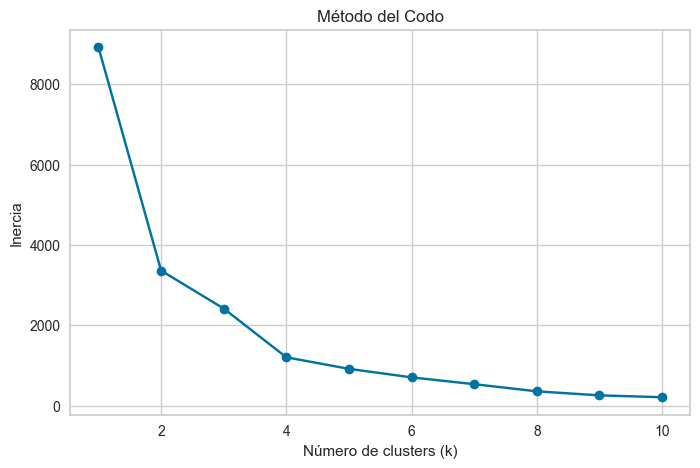

In [ ]:
# Implementamos el m√©todo del codo

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(matriz_X)
    inertia.append(kmeans.inertia_)

# Gr√°fico
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo')
plt.grid(True)
plt.show()

A partir del gr√°fico podemos observar que el ‚Äúcodo‚Äù (el punto donde la curva se empieza a aplanar) sucede cuando k=4

In [ ]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
city_coords['Region'] = kmeans.fit_predict(city_coords[['Latitude', 'Longitude']].values)

# Unimos al dataset original
df = df.merge(city_coords[['Location', 'Region']], on='Location', how='left')

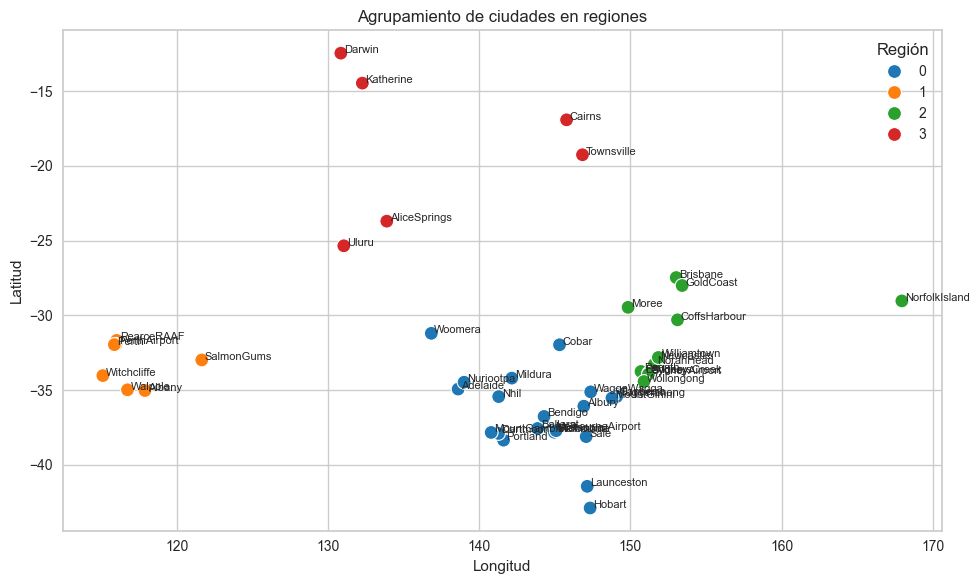

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=city_coords,
    x='Longitude', y='Latitude',
    hue='Region',
    palette='tab10',
    s=100
)

for _, row in city_coords.iterrows():
    plt.text(row['Longitude'] + 0.2, row['Latitude'], row['Location'], fontsize=8)

plt.title('Agrupamiento de ciudades en regiones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Regi√≥n')
plt.grid(True)
plt.tight_layout()
plt.show()

A partir del gr√°fico podemos observar que las ciudades se agrupan de manera coherente en funci√≥n de su ubicaci√≥n geogr√°fica

# An√°lisis descriptivo y exploratorio

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitude', 'Longitude',
       'Region'],
      dtype='object')

El dataset cuenta con las siguientes variables:
1. **Date**: Fecha en la que se realizaron las observaciones meteorol√≥gicas
2. **Location**: Ciudad donde se realiz√≥ la medici√≥n del clima
3. **MinTemp**: Temperatura m√≠nima registrada durante el d√≠a (grados Celsius)
4. **MaxTemp**: Temperatura m√°xima registrada durante el d√≠a (grados Celsius)
5. **Rainfall**: Cantidad de precipitaci√≥n registrada para el d√≠a (mil√≠metros)
6. **Evaporation**: Cantidad estimada de agua evaporada en el d√≠a (mil√≠metros)
7. **Sunshine**: Cantidad de horas de sol durante el d√≠a
8. **WindGustDir**: Direcci√≥n del viento en el momento de la r√°faga de viento m√°s fuerte del d√≠a
9. **WindGustSpeed**: Velocidad del viento en la r√°faga m√°s fuerte del d√≠a (km/h)
10. **WindDir9am**: Direcci√≥n del viento a las 9am
11. **WindDir3pm**: Direcci√≥n del viento a las 3pm
12. **WindSpeed9am**: Velocidad del viento a las 9am (km/h)
13. **WindSpeed3pm**: Velocidad del viento a las 3pm (km/h)
14. **Humidity9am**: Humedad relativa a las 9am (porcentaje %)
15. **Humidity3pm**: Humedad relativa a las 3pm (porcentaje %)
16. **Pressure9am**: Presi√≥n atmosf√©rica las 9am (hectopascales hPa)
17. **Pressure3pm**: Presi√≥n atmosf√©rica a las 3pm (hectopascales hPa)
18. **Cloud9am**: Cobertura nubosa a las 9am (octavos)
19. **Cloud3pm**: Cobertura nubosa a las 3pm (octavos)
20. **Temp9am**: Temperatura a las 9am (grados Celsius)
21. **Temp3pm**: Temperatura registrada a las 3pm (grados Celsius)
22. **RainToday**: Variable categ√≥rica binaria (S√≠/No) que indica si llovi√≥ en el d√≠a actual
23. **RainTomorrow**: Variable categ√≥rica binaria (S√≠/No) que indica si llover√° al d√≠a siguiente
24. **Latitude**: Latitud geogr√°fica de la ciudad donde se realiz√≥ la observaci√≥n
25. **Longitude**: Longitud geogr√°fica de la ciudad donde se realiz√≥ la observaci√≥n
26. **Region**: Regi√≥n geogr√°fica asignada a la ciudad seg√∫n agrupamiento por coordenadas (clusters mediante K-Means)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Verificamos valores faltantes
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Latitude             0
Longitude            0
Region               0
dtype: int64

In [ ]:
# Resumen descriptivo de las variables
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm       Latitude  \
count  89572.000000  86102.000000  143693.000000  141851.00000  145460.000000   
mean       4.447461      4.509930      16.990631      21.68339     -32.861469   
std        2.887159      2.720357       6.488753       6.93665       6.035275   
min        0.000000      0.000000      -7.200000      -5.40000     -42.882509   
25%        1.000000      2.000000      12.300000      16.60000     -36.759018   
50%        5.000000      5.000000      16.700000      21.10000     -34.026335   
75%        7.000000      7.000000      21.600000      26.40000     -31.673960   
max        9.000000      9.000000      40.200000      46.70000     -12.460440   

           Longitude         Region  
count  145460.000000  145460.000000  
mean      141.960053       1.011825  
std        12.034143       1.082912  
min       115.100477       0.000000  
25%       138.599931       0.000000  
50%       145.304505       1.000000  
75%       150.694171       2.000000  
max       167.948314       3.000000

El dataset cuenta con 23 columnas y un total de 145460 registros, siendo la mayor√≠a de las variables de tipo object (variables categ√≥ricas) o float64 (variables n√∫mericas).

Casi todas las variables tienen valores faltantes, en donde la mayor cantidad se concentra en Sunshine (cantidad de horas de luz solar), Evaporation (evaporaci√≥n), Cloud9am y Cloud3am (cobertura nubosa).

Las √∫nicas columnas con valores negativos son MinTemp, MaxTemp, Temp9am y Temp3pm. Esto es correcto ya que la temperatura puede ser negativa a diferencia de las dem√°s variables.

Calculamos el porcentaje de valores faltantes por cada variable sobre el total del dataset

In [ ]:
nan_cant = df.isnull().sum()
nan_porcentaje = (nan_cant / len(df)) * 100

nan_info = pd.DataFrame({
    'Cantidad': nan_cant,
    'Porcentaje': nan_porcentaje
})

print(nan_info)

               Cantidad  Porcentaje
Date                  0    0.000000
Location              0    0.000000
MinTemp            1485    1.020899
MaxTemp            1261    0.866905
Rainfall           3261    2.241853
Evaporation       62790   43.166506
Sunshine          69835   48.009762
WindGustDir       10326    7.098859
WindGustSpeed     10263    7.055548
WindDir9am        10566    7.263853
WindDir3pm         4228    2.906641
WindSpeed9am       1767    1.214767
WindSpeed3pm       3062    2.105046
Humidity9am        2654    1.824557
Humidity3pm        4507    3.098446
Pressure9am       15065   10.356799
Pressure3pm       15028   10.331363
Cloud9am          55888   38.421559
Cloud3pm          59358   40.807095
Temp9am            1767    1.214767
Temp3pm            3609    2.481094
RainToday          3261    2.241853
RainTomorrow       3267    2.245978
Latitude              0    0.000000
Longitude             0    0.000000
Region                0    0.000000


Decidimos eliminar las filas donde la variable target ('RainTomorrow') sea nula

In [ ]:
df = df.dropna(subset=['RainTomorrow'])

Eliminamos las filas donde haya m√°s de 10 variables con valores faltantes

In [ ]:
df = df.dropna(thresh=df.shape[1] - 10)

In [ ]:
# Convertimos la variable Date a tipo date
df['Date'] = pd.to_datetime(df['Date'])

# Separamos la variable Date en Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Eliminamos la variable Date original
df = df.drop(columns=['Date'])

In [ ]:
# Obtener dummies para las columnas RainToday y RainTomorrow
df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)
# Renombrar las columnas
df = df.rename(columns={'RainToday_Yes': 'RainToday', 'RainTomorrow_Yes': 'RainTomorrow'})
# Convertir las columnas RainToday y RainTomorrow a 0 y 1
df['RainToday'] = df['RainToday'].astype(int)
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

In [ ]:
print("=== Estad√≠sticas descriptivas (categ√≥ricas) ===")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(f"- Valores √∫nicos: {df[col].nunique()}")
    print(f"- Frecuencias:\n{df[col].value_counts().head(5)}")
    print(f"- Valores nulos: {df[col].isnull().sum()}")

=== Estad√≠sticas descriptivas (categ√≥ricas) ===

Columna: Location
- Valores √∫nicos: 49
- Frecuencias:
Location
Sydney      3337
Canberra    3206
Perth       3193
Darwin      3192
Hobart      3188
Name: count, dtype: int64
- Valores nulos: 0

Columna: WindGustDir
- Valores √∫nicos: 16
- Frecuencias:
WindGustDir
W      9754
SE     9301
E      9058
N      9024
SSE    8989
Name: count, dtype: int64
- Valores nulos: 7725

Columna: WindDir9am
- Valores √∫nicos: 16
- Frecuencias:
WindDir9am
N      11360
SE      9068
E       9014
SSE     8964
S       8488
Name: count, dtype: int64
- Valores nulos: 8715

Columna: WindDir3pm
- Valores √∫nicos: 16
- Frecuencias:
WindDir3pm
SE     10633
W       9884
S       9590
WSW     9306
SW      9171
Name: count, dtype: int64
- Valores nulos: 2226


In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Latitude', 'Longitude', 'Region', 'Year', 'Month', 'Day',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Eliminamos la columna Location ya que no la utilizaremos
df = df.drop(columns=['Location'])

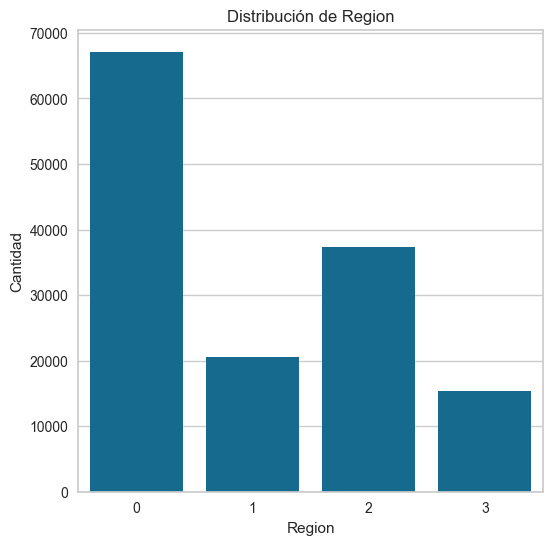

In [ ]:
# Distribuci√≥n de la variable Region
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Region'])
plt.title('Distribuci√≥n de Region')
plt.xlabel('Region')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Filtrar las columnas num√©ricas del dataset
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Eliminamos las variables que no vamos a graficar (Latitude, Longitude, Region, RainToday, RainTomorrow)
df_numerico = df_numerico.drop(columns=['Latitude', 'Longitude'])

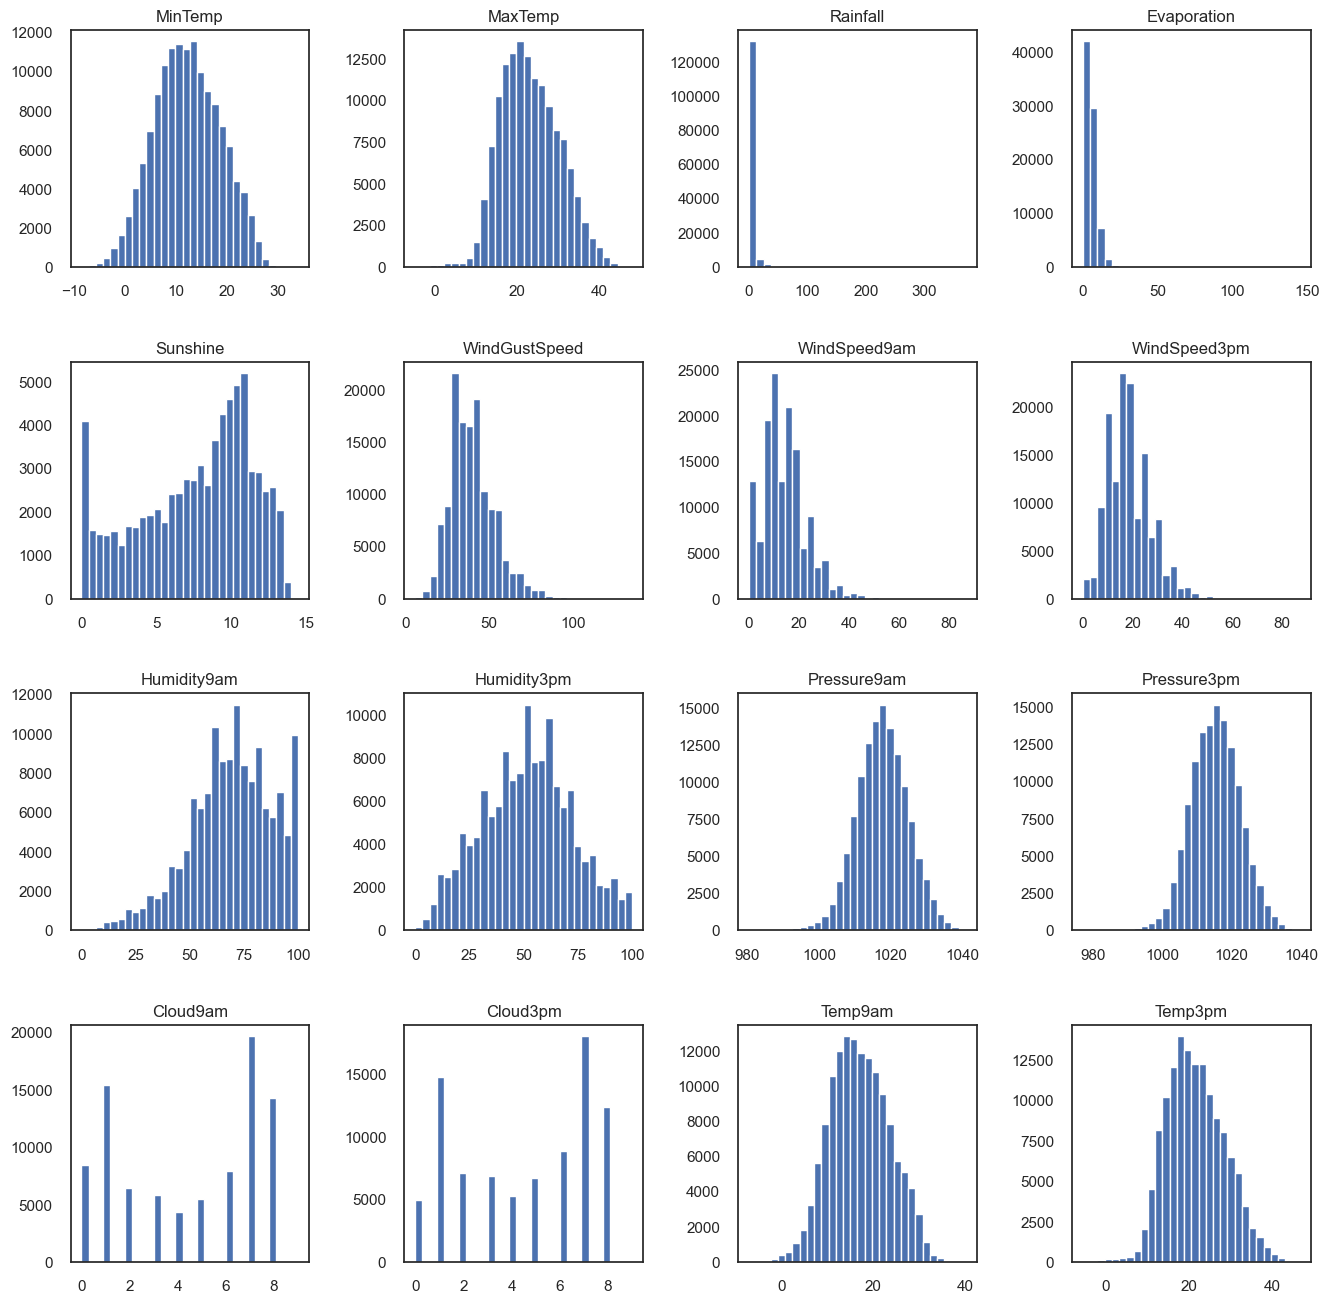

In [ ]:
# Determinar la cantidad de variables num√©ricas
num_vars = len(df_numerico.columns)

# Configurar la figura y las subplots
fig, axes = plt.subplots(nrows=(num_vars // 4) + (num_vars % 4 > 0), ncols=4, figsize=(16, num_vars))

fig.subplots_adjust(hspace=0.4, wspace=0.4) # Ajustar espacio entre los gr√°ficos

# Iterar sobre las columnas y plotear cada una en su propio subplot (histograma)
for i, column in enumerate(df_numerico.columns):
    row, col = divmod(i, 4)
    axes[row, col].hist(df_numerico[column], bins=30)
    axes[row, col].set_title(column)

# Eliminar gr√°ficos vac√≠os en caso de no completar la √∫ltima fila
for j in range(i + 1, axes.size):
    fig.delaxes(axes.flat[j])

plt.show()

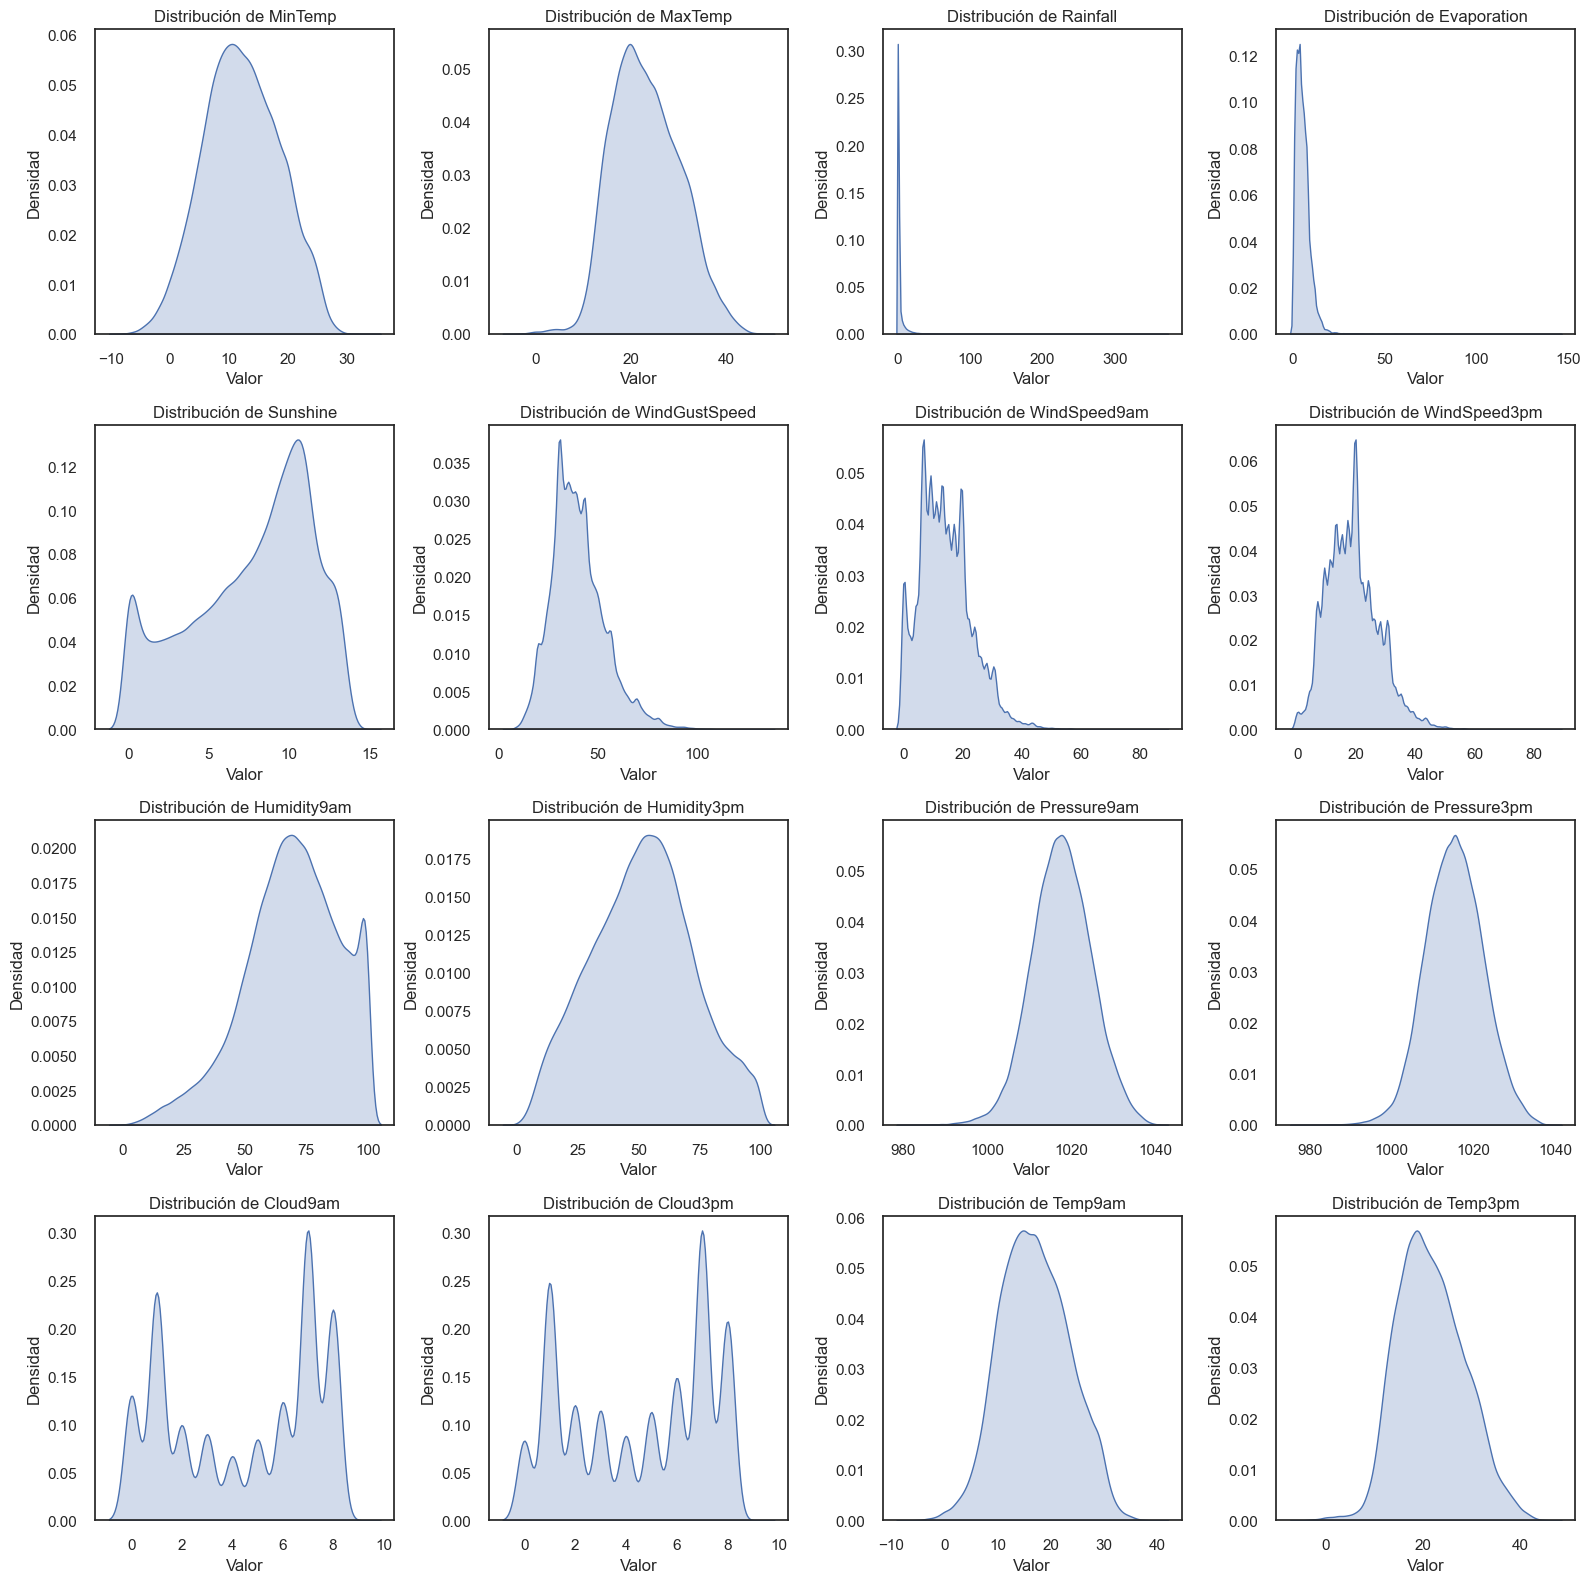

In [ ]:
fig, axes = plt.subplots(nrows=(num_vars // 4) + (num_vars % 4 > 0), ncols=4, figsize=(16, num_vars))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten()

# Graficar densidad por cada variable
for i, column in enumerate(df_numerico.columns):
    sns.kdeplot(data=df_numerico, x=column, ax=axes[i], fill=True)
    axes[i].set_title(f'Distribuci√≥n de {column}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Densidad')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

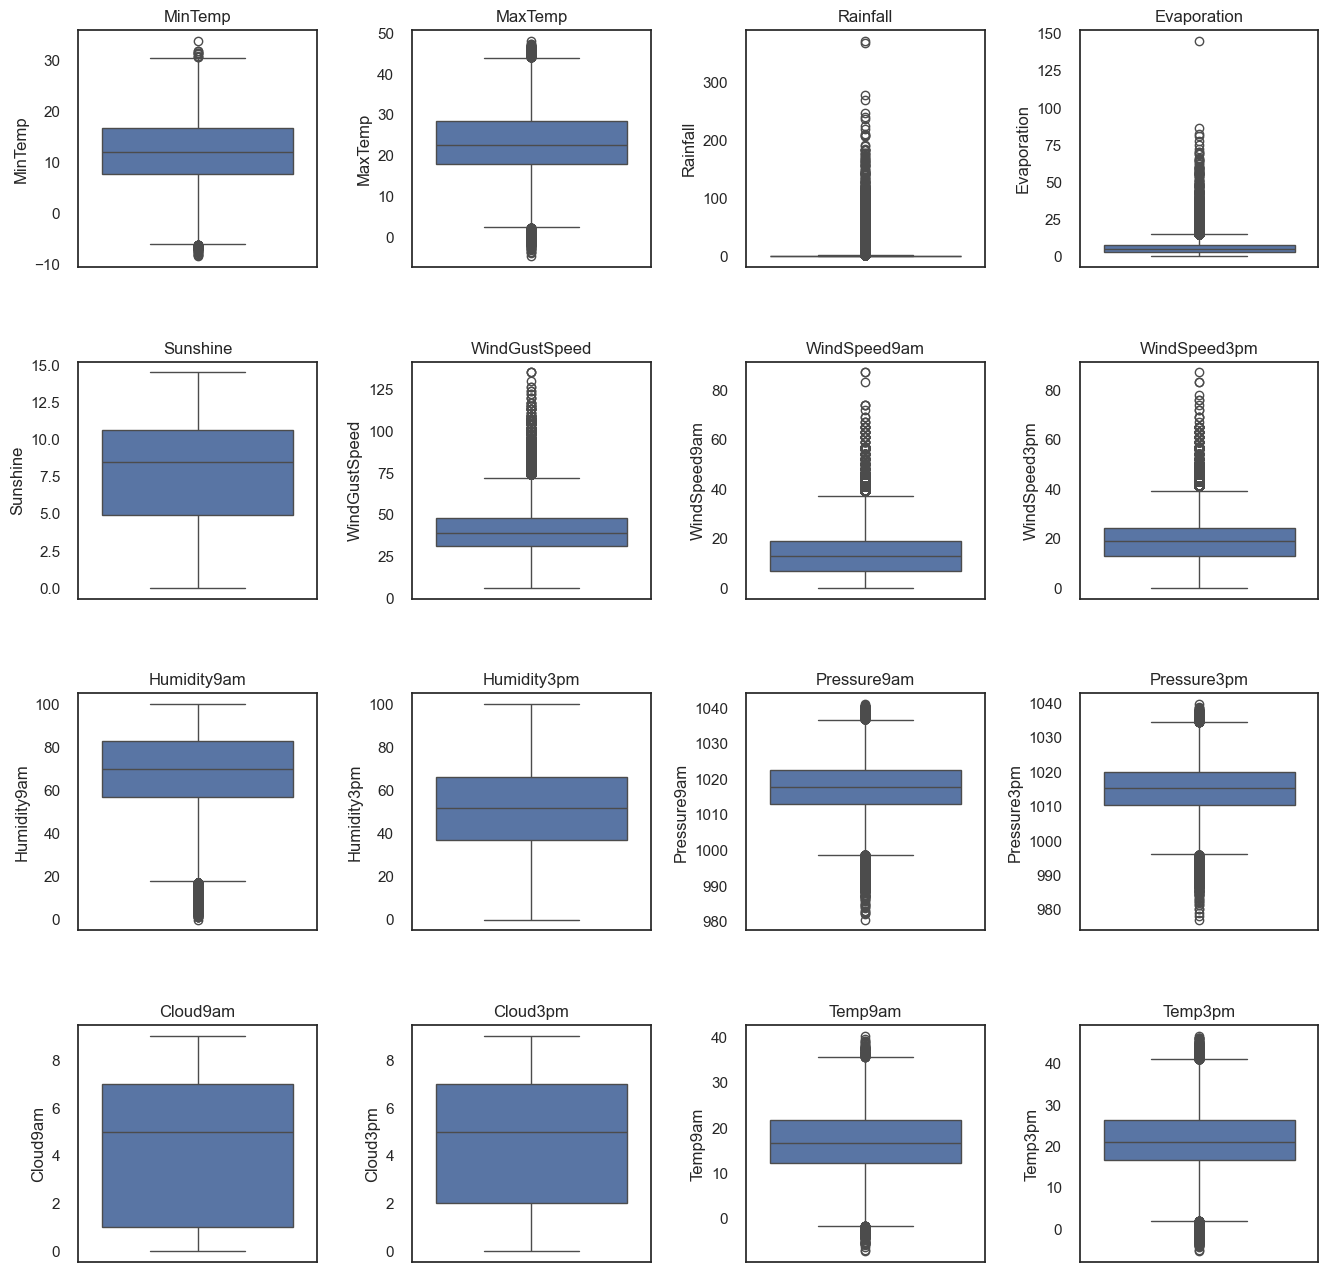

In [ ]:
fig, axes = plt.subplots(nrows=(num_vars // 4) + (num_vars % 4 > 0), ncols=4, figsize=(16, num_vars))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Graficar boxplot para cada variable
for i, column in enumerate(df_numerico.columns):
    row, col = divmod(i, 4)
    sns.boxplot(data=df_numerico, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

for j in range(i + 1, axes.size):
    fig.delaxes(axes.flat[j])

plt.show()

Al analizar la distribuci√≥n y los boxplots de las variables num√©ricas, podemos observar que hay:
- Distribuciones sim√©tricas (normales): hay gr√°ficos de variables que tienen forma de campana, similar a la de distribuci√≥n normal
- Distribuciones asim√©tricas (sesgadas): existen variables que muestran sesgo hacia la izquierda o la derecha
- Outliers: la mayor√≠a de las variables presentan valores at√≠picos, pero hay que considerar que pueden representar eventos meteorol√≥gicos reales
- Distribuciones multimodales: algunas variables cuentan con distribuciones multimodales

In [ ]:
temperature_vars = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
df[temperature_vars].describe()

MinTemp        MaxTemp        Temp9am        Temp3pm
count  140131.000000  140217.000000  139974.000000  138722.000000
mean       12.189084      23.231610      16.982772      21.695417
std         6.403174       7.116195       6.499842       6.933308
min        -8.500000      -4.800000      -7.200000      -5.400000
25%         7.600000      17.900000      12.300000      16.600000
50%        12.000000      22.600000      16.700000      21.100000
75%        16.800000      28.300000      21.600000      26.400000
max        33.900000      48.100000      40.200000      46.700000

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

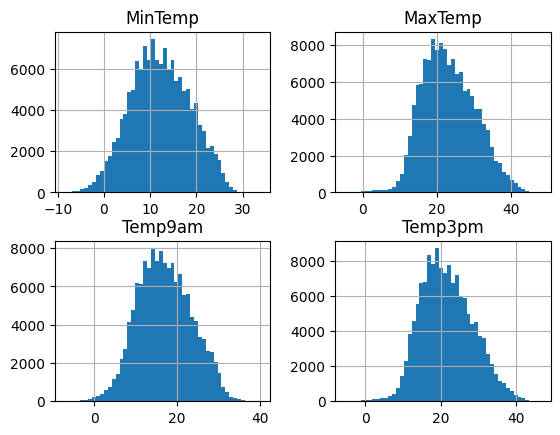

In [ ]:
df[temperature_vars].hist(bins=50)

Se observa que las cuatro variables tienen un comportamiento bastante similar y con distribuciones aproximadamente normales

In [ ]:
humidity_vars = ['Humidity9am', 'Humidity3pm']
df[humidity_vars].describe()

Humidity9am    Humidity3pm
count  139128.000000  137852.000000
mean       68.824040      51.475278
std        19.073627      20.792876
min         0.000000       0.000000
25%        57.000000      37.000000
50%        70.000000      52.000000
75%        83.000000      66.000000
max       100.000000     100.000000

array([[<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>]], dtype=object)

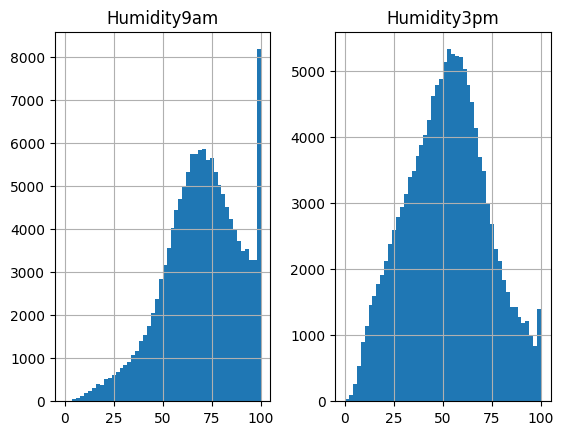

In [ ]:
df[humidity_vars].hist(bins=50)

El rango de valores de las variables de humedad est√° entre 0 y 100, lo cual es l√≥gico ya que la humedad se mide en porcentaje.

**Humidity9am** est√° claramente sesgada a la izquierda, con un extremo en 100%, indicando que en muchos d√≠as la humedad es total a esa hora.

**Humidity3pm** tiene una distribuci√≥n m√°s parecida a una campana, aunque levemente sesgada hacia la derecha. Muestra que la humedad suele disminuir a la tarde.

In [ ]:
preassure_vars = ['Pressure9am', 'Pressure3pm']
df[preassure_vars].describe()

Pressure9am    Pressure3pm
count  128105.000000  128089.000000
mean     1017.653054    1015.258150
std         7.105174       7.036359
min       980.500000     977.100000
25%      1012.900000    1010.400000
50%      1017.600000    1015.200000
75%      1022.400000    1020.000000
max      1041.000000    1039.600000

array([[<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>]], dtype=object)

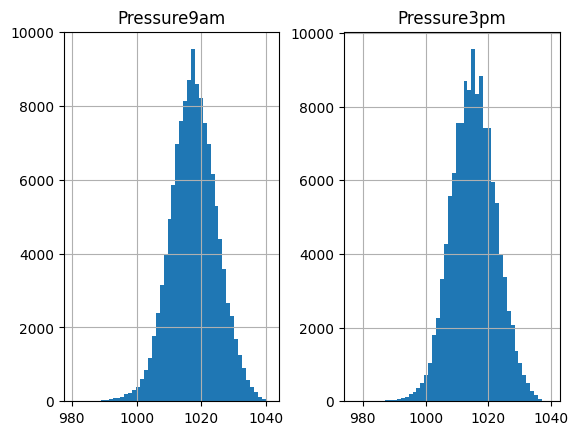

In [ ]:
df[preassure_vars].hist(bins=50)

Ambas variables muestran una distribuci√≥n muy sim√©trica, semejante a la normal

In [ ]:
cloud_vars = ['Cloud9am', 'Cloud3pm']
df[cloud_vars].describe()

Cloud9am      Cloud3pm
count  87768.000000  85033.000000
mean       4.440081      4.503452
std        2.885344      2.720563
min        0.000000      0.000000
25%        1.000000      2.000000
50%        5.000000      5.000000
75%        7.000000      7.000000
max        9.000000      9.000000

array([[<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>]], dtype=object)

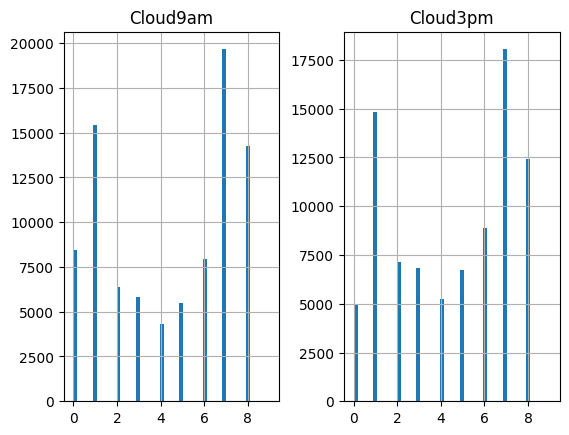

In [ ]:
df[cloud_vars].hist(bins=50)

Las variables de nubosidad son variables discretas, cuentan con valores de 0 a 8, donde:

0 = cielo despejado

8 = cielo completamente cubierto de nubes

Se observa que la variable Cloud9am tiene una distribuci√≥n bimodal, indicando que, en su mayor√≠a, por la ma√±ana, el cielo tiende a estar o despejado o completamente cubierto. Aunque Cloud3pm tiene un comportamiento similar.

###Boxplots de variables num√©ricas seg√∫n la regi√≥n

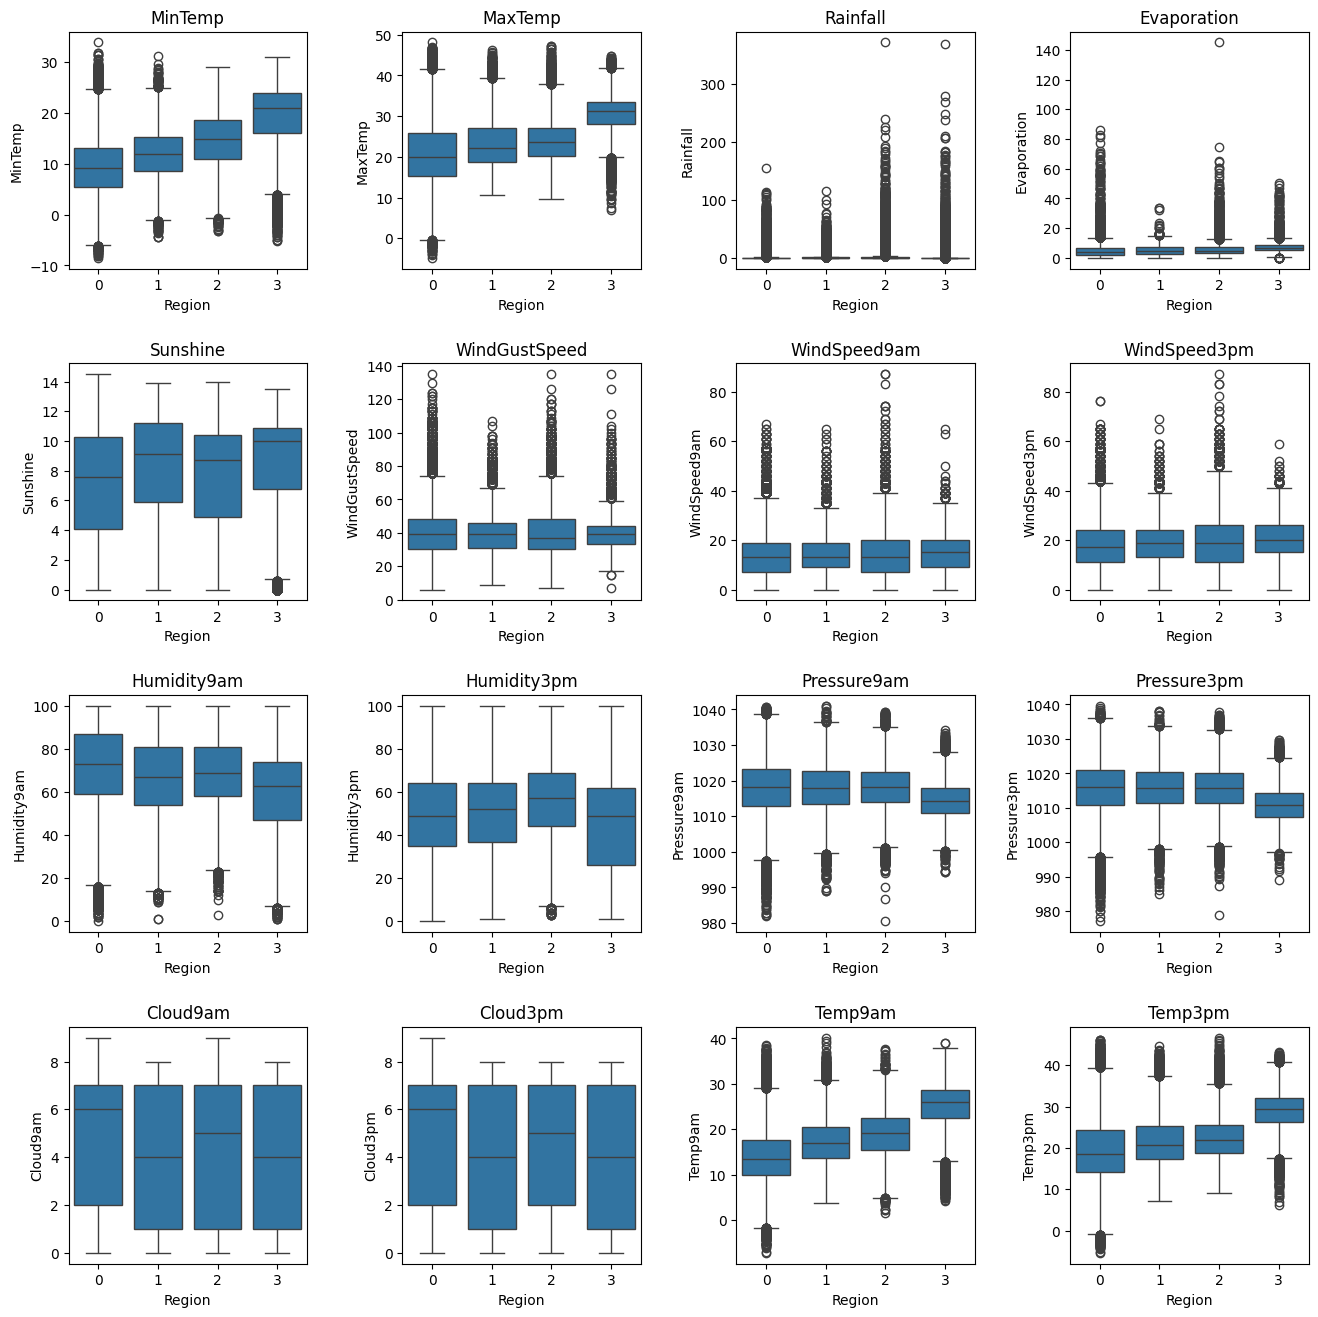

In [ ]:
fig, axes = plt.subplots(nrows=(num_vars // 4) + (num_vars % 4 > 0), ncols=4, figsize=(16, num_vars))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(df_numerico):
    row, col = divmod(i, 4)
    sns.boxplot(x='Region', data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Eliminar vac√≠os en caso de no completar la √∫ltima fila
for j in range(i + 1, axes.size):
    fig.delaxes(axes.flat[j])

plt.show()

A partir de los boxplots de las variables num√©ricas seg√∫n la regi√≥n, podemos analizar que:

- Temperatura (MinTemp, MaxTemp, Temp9am, Temp3pm): La regi√≥n 0 y 1 parecen tener temperaturas m√°s altas que la regi√≥n 2, indicando zonas posiblemente m√°s c√°lidas. Mientras que la regi√≥n 2 muestra temperaturas m√°s bajas.

- Rainfall: La regi√≥n 2 muestra mayor variabilidad y valores extremos

- Sunshine: Las regiones 0 y 1 tienen m√°s horas de sol (mayores medianas), mientras que la 2 parece m√°s nublada.

- Wind Variables (WindGustSpeed, WindSpeed9am/3pm): La regi√≥n 3 muestra velocidades de viento m√°s elevadas.

- Presi√≥n (Pressure9am/3pm): Aunque no hay diferencias tan marcadas, la regi√≥n 1 parece tener presiones atmosf√©ricas ligeramente m√°s altas.

- Cloud9am/Cloud3pm: La regi√≥n 2 muestra m√°s cobertura nubosa, lo cual coincide con la menor cantidad de sol.

### Boxplots de las variables num√©ricas en funci√≥n de la variable target RainTomorrow

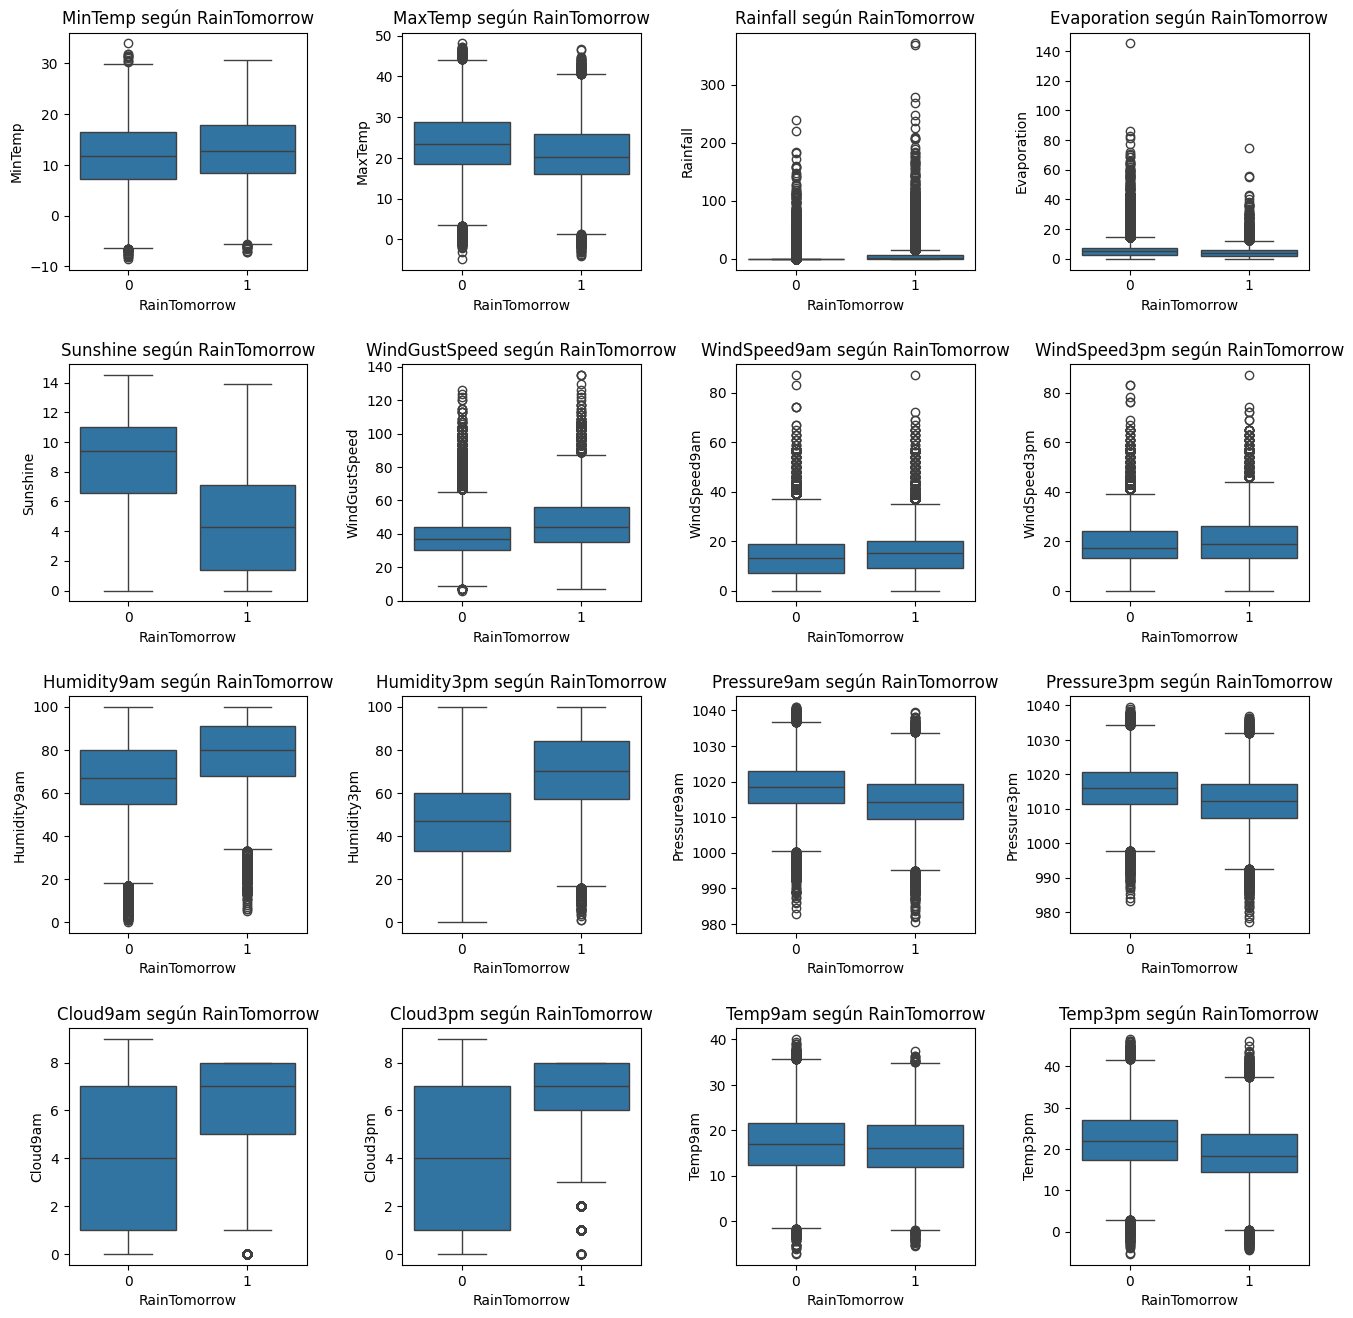

In [ ]:
fig, axes = plt.subplots(nrows=(num_vars // 4) + (num_vars % 4 > 0), ncols=4, figsize=(16, num_vars))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(df_numerico):
    row, col_idx = divmod(i, 4)
    sns.boxplot(x='RainTomorrow', data=df, y=column, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{column} seg√∫n RainTomorrow')
    axes[row, col_idx].set_xlabel('RainTomorrow')
    axes[row, col_idx].set_ylabel(column)

for j in range(i + 1, axes.size):
    fig.delaxes(axes.flat[j])

plt.show()

A partir del an√°lisis de variables num√©ricas frente a la variable target, podemos deducir que:

- Temperaturas (MinTemp, MaxTemp, Temp9am, Temp3pm): Generalmente m√°s bajas en d√≠as que llueve al d√≠a siguiente.

- Rainfall y Evaporation: En el d√≠a previo a la lluvia, puede haber habido m√°s precipitaci√≥n y evaporaci√≥n.

- Sunshine: La cantidad de luz solar es mucho menor en los d√≠as previos a la lluvia. Los d√≠as soleados se asocian con menos probabilidad de lluvia.

- Vientos (WindGustSpeed, WindSpeed9am, WindSpeed3pm): Tienden a ser m√°s fuertes cuando hay lluvia el d√≠a siguiente.

- Humedad (Humidity9am, Humidity3pm): Es mucho mayor en los d√≠as previos a la lluvia. Un alto nivel de humedad es un buen predictor de lluvia.

- Presi√≥n atmosf√©rica (Pressure9am y Pressure3pm): Ligeramente m√°s baja antes de d√≠as con lluvia.

- Nubosidad (Cloud9am y Cloud3pm): Una mayor nubosidad est√° asociada a mayor probabilidad de lluvia.

### Distribuci√≥n de la variable target RainTomorrow

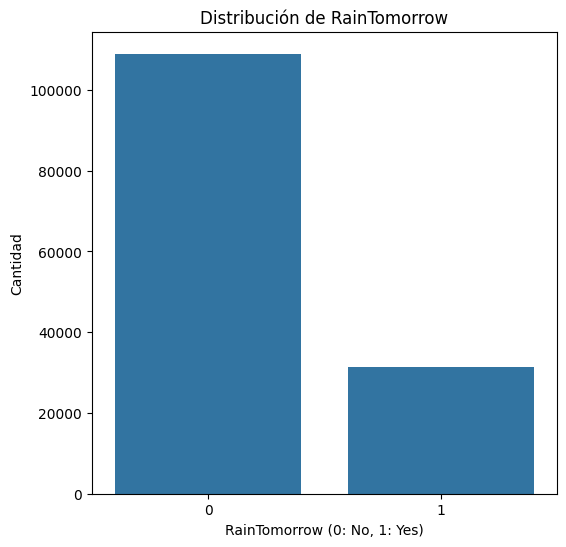

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['RainTomorrow'])
plt.title('Distribuci√≥n de RainTomorrow')
plt.xlabel('RainTomorrow (0: No, 1: Yes)')
plt.ylabel('Cantidad')
plt.show()

Podemos observar que hay un claro desbalanceo de los datos, ya que la cantidad de registros con "No" es mayor a la cantidad de registros con "Yes".

Creemos que se hace esta pregunta para analizar cuestiones que puedan surgir a futuro en nuestro modelo y c√≥mo esto lo afecta.

# Divisi√≥n del conjunto de datos, Train y Test

In [ ]:
# Definir las variables predictoras y la variable objetivo
X = df.drop(columns=['RainTomorrow'], axis=1)  # no usamos la columna objetivo
y = df['RainTomorrow']

# Dividir el conjunto en entrenamiento y prueba (sin imputar)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reporte r√°pido
print("Tama√±o entrenamiento:", X_train.shape)
print("Tama√±o prueba:", X_test.shape)
print("Distribuci√≥n en y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribuci√≥n en y_test:")
print(y_test.value_counts(normalize=True))

Tama√±o entrenamiento: (112318, 26)
Tama√±o prueba: (28080, 26)
Distribuci√≥n en y_train:
RainTomorrow
0    0.776082
1    0.223918
Name: proportion, dtype: float64

Distribuci√≥n en y_test:
RainTomorrow
0    0.776104
1    0.223896
Name: proportion, dtype: float64


# Imputaci√≥n de valores faltantes


- En base al comportamiento de las variables num√©ricas, decidimos imputar los valores faltantes de la siguiente manera:
  - Media: a las variables que muestran una distribuci√≥n sim√©trica y normal
  - Mediana: es m√°s robusta para las variables que tienen una distribuci√≥n sesgada o con valores at√≠picos
  - KNN: a las variables que tienen distribuciones multimodales

- Para las variables categ√≥ricas, utilizaremos otro enfoque para imputar los valores faltantes, como la moda de las variables (la categor√≠a m√°s frecuente en cada columna).

In [ ]:
def imputar_por_region(df, cols_media, cols_mediana, cols_knn):
    df_imputed = df.copy()

    # Media por regi√≥n
    for col in cols_media:
        df_imputed[col] = df_imputed[col].fillna(
            df_imputed.groupby('Region')[col].transform('mean')
        )

    # Mediana por regi√≥n
    for col in cols_mediana:
        df_imputed[col] = df_imputed[col].fillna(
            df_imputed.groupby('Region')[col].transform('median')
        )

    # KNN por regi√≥n
    for region in df_imputed['Region'].unique():
        df_region = df_imputed[df_imputed['Region'] == region]
        imputador = KNNImputer(n_neighbors=5)
        imputadas = imputador.fit_transform(df_region[cols_knn])
        df_imputed.loc[df_region.index, cols_knn] = imputadas

    return df_imputed

In [ ]:
# Columnas por tipo de imputaci√≥n
cols_media = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm']
cols_mediana = ['Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
cols_knn = ['Cloud9am', 'Cloud3pm', 'Sunshine']

In [ ]:
# Aplicar imputaci√≥n por separado en cada conjunto
X_train_imputed = imputar_por_region(X_train, cols_media, cols_mediana, cols_knn)
X_test_imputed = imputar_por_region(X_test, cols_media, cols_mediana, cols_knn)

In [ ]:
# Imputar variables categ√≥ricas con la moda por regi√≥n usando solo X_train
cat_cols = X_train.select_dtypes(include='object').columns

for col in cat_cols:
    # Obtener la moda por regi√≥n en el set de train
    moda_por_region = X_train.groupby('Region')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    # Imputar X_train
    X_train_imputed[col] = X_train_imputed.apply(
        lambda row: row[col] if pd.notnull(row[col]) else moda_por_region.loc[row['Region']],
        axis=1
    )

    # Imputar X_test usando moda de X_train
    X_test_imputed[col] = X_test_imputed.apply(
        lambda row: row[col] if pd.notnull(row[col]) else moda_por_region.loc[row['Region']],
        axis=1
    )

In [ ]:
print("\nNulos restantes en X_train_imputed:", X_train_imputed.isnull().sum().sum())
print("Nulos restantes en X_test_imputed:", X_test_imputed.isnull().sum().sum())


Nulos restantes en X_train_imputed: 0
Nulos restantes en X_test_imputed: 0


# Codificaci√≥n de variables categ√≥ricas

In [ ]:
# Agrupaciones simplificadas de direcciones de viento
direccion_viento = {
    'N': ['N', 'NNW', 'NNE', 'NE', 'NW'],
    'S': ['S', 'SSW', 'SSE', 'SE', 'SW'],
    'E': ['E', 'ENE', 'ESE'],
    'W': ['W', 'WNW', 'WSW'],
}
mapa_direcciones = {v: k for k, lista in direccion_viento.items() for v in lista}

# Columnas a transformar
columnas_viento = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
columnas_dummies = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
def procesar_X_fit(df, columnas_viento, columnas_dummies):
    df = df.copy()

    # Agrupar direcciones de viento
    for col in columnas_viento:
        df[col] = df[col].map(mapa_direcciones)

    # One-hot encoding y guardar columnas creadas
    df_dummies = pd.get_dummies(df, columns=columnas_dummies, drop_first=True)
    dummy_cols = df_dummies.columns.difference(df.columns).tolist()

    # Convertir a 0/1
    df_dummies.replace({True: 1, False: 0}, inplace=True)
    df_dummies.infer_objects(copy=False)

    return df_dummies, dummy_cols

def procesar_X_transform(df, columnas_viento, columnas_dummies, dummy_cols_train):
    df = df.copy()

    # Agrupar direcciones de viento
    for col in columnas_viento:
        df[col] = df[col].map(mapa_direcciones)

    # One-hot encoding
    df_dummies = pd.get_dummies(df, columns=columnas_dummies, drop_first=True)

    # Asegurar que tenga las mismas columnas que el train
    for col in dummy_cols_train:
        if col not in df_dummies.columns:
            df_dummies[col] = 0  # agregar columna faltante

    # Reordenar columnas para que coincidan
    df_dummies = df_dummies.reindex(columns=sorted(dummy_cols_train +
                        [col for col in df.columns if col not in columnas_dummies]), fill_value=0)

    # Convertir booleanos
    df_dummies.replace({True: 1, False: 0}, inplace=True)
    df_dummies.infer_objects(copy=False)


    return df_dummies

In [ ]:
# Fit-transform en entrenamiento
X_train_processed, dummy_cols = procesar_X_fit(
    X_train_imputed, columnas_viento, columnas_dummies
)

# Transform en test con mismas columnas
X_test_processed = procesar_X_transform(
    X_test_imputed, columnas_viento, columnas_dummies, dummy_cols
)

In [ ]:
X_train_processed.head()

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
21414      13.9     19.7       0.0          4.6  10.700000           31.0   
590         6.2     10.0      21.4          3.9   2.220000           57.0   
79524       8.7     11.9       8.4          1.0   0.000000           37.0   
104169     10.8     25.2       0.1          4.1  11.000000           30.0   
5385        2.7     20.1       0.0          4.8   7.540887           20.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
21414           13.0          20.0         59.0         55.0  ...          0   
590             24.0          19.0         82.0         91.0  ...          1   
79524           13.0          15.0        100.0        100.0  ...          1   
104169          15.0          17.0         64.0         42.0  ...          0   
5385             9.0           4.0         69.0         37.0  ...          0   

        WindGustDir_N  WindGustDir_S  WindGustDir_W  WindDir9am_N  \
21414               0              1              0             0   
590                 1              0              0             1   
79524               0              1              0             0   
104169              0              0              0             1   
5385                0              0              0             0   

        WindDir9am_S  WindDir9am_W  WindDir3pm_N  WindDir3pm_S  WindDir3pm_W  
21414              0             1             0             1             0  
590                0             0             1             0             0  
79524              1             0             0             1             0  
104169             0             0             0             0             1  
5385               1             0             1             0             0  

[5 rows x 32 columns]

In [ ]:
X_test_processed.head()

Cloud3pm  Cloud9am  Day  Evaporation  Humidity3pm  Humidity9am  \
78429   7.00000  3.000000   17         11.8         30.0         57.0   
86251   4.00000  4.000000   20          7.0         64.0         64.0   
70801   8.00000  8.000000   13          9.0         39.0         66.0   
24206   4.42029  4.344719   17          4.8         62.0         93.0   
25777   4.42029  4.344719    5          4.8         35.0         92.0   

        Latitude   Longitude  MaxTemp  MinTemp  ...  WindDir9am_N  \
78429 -37.710947  145.083781     32.8     17.0  ...             0   
86251 -27.468962  153.023501     28.9     19.1  ...             1   
70801 -34.195274  142.150315     28.7     18.1  ...             0   
24206 -33.751195  150.694171     22.4     17.2  ...             0   
25777 -33.751195  150.694171     28.3      8.3  ...             1   

       WindDir9am_S  WindDir9am_W  WindGustDir_N  WindGustDir_S  \
78429             0             0              1              0   
86251             0             0              1              0   
70801             1             0              0              1   
24206             1             0              0              1   
25777             0             0              0              1   

       WindGustDir_W  WindGustSpeed  WindSpeed3pm  WindSpeed9am  Year  
78429              0           39.0          22.0           9.0  2010  
86251              0           33.0          13.0           7.0  2014  
70801              0           28.0          11.0          19.0  2010  
24206              0           33.0          17.0           9.0  2009  
25777              0           17.0           2.0           2.0  2013  

[5 rows x 32 columns]

# Matriz de correlaci√≥n (num√©rica)

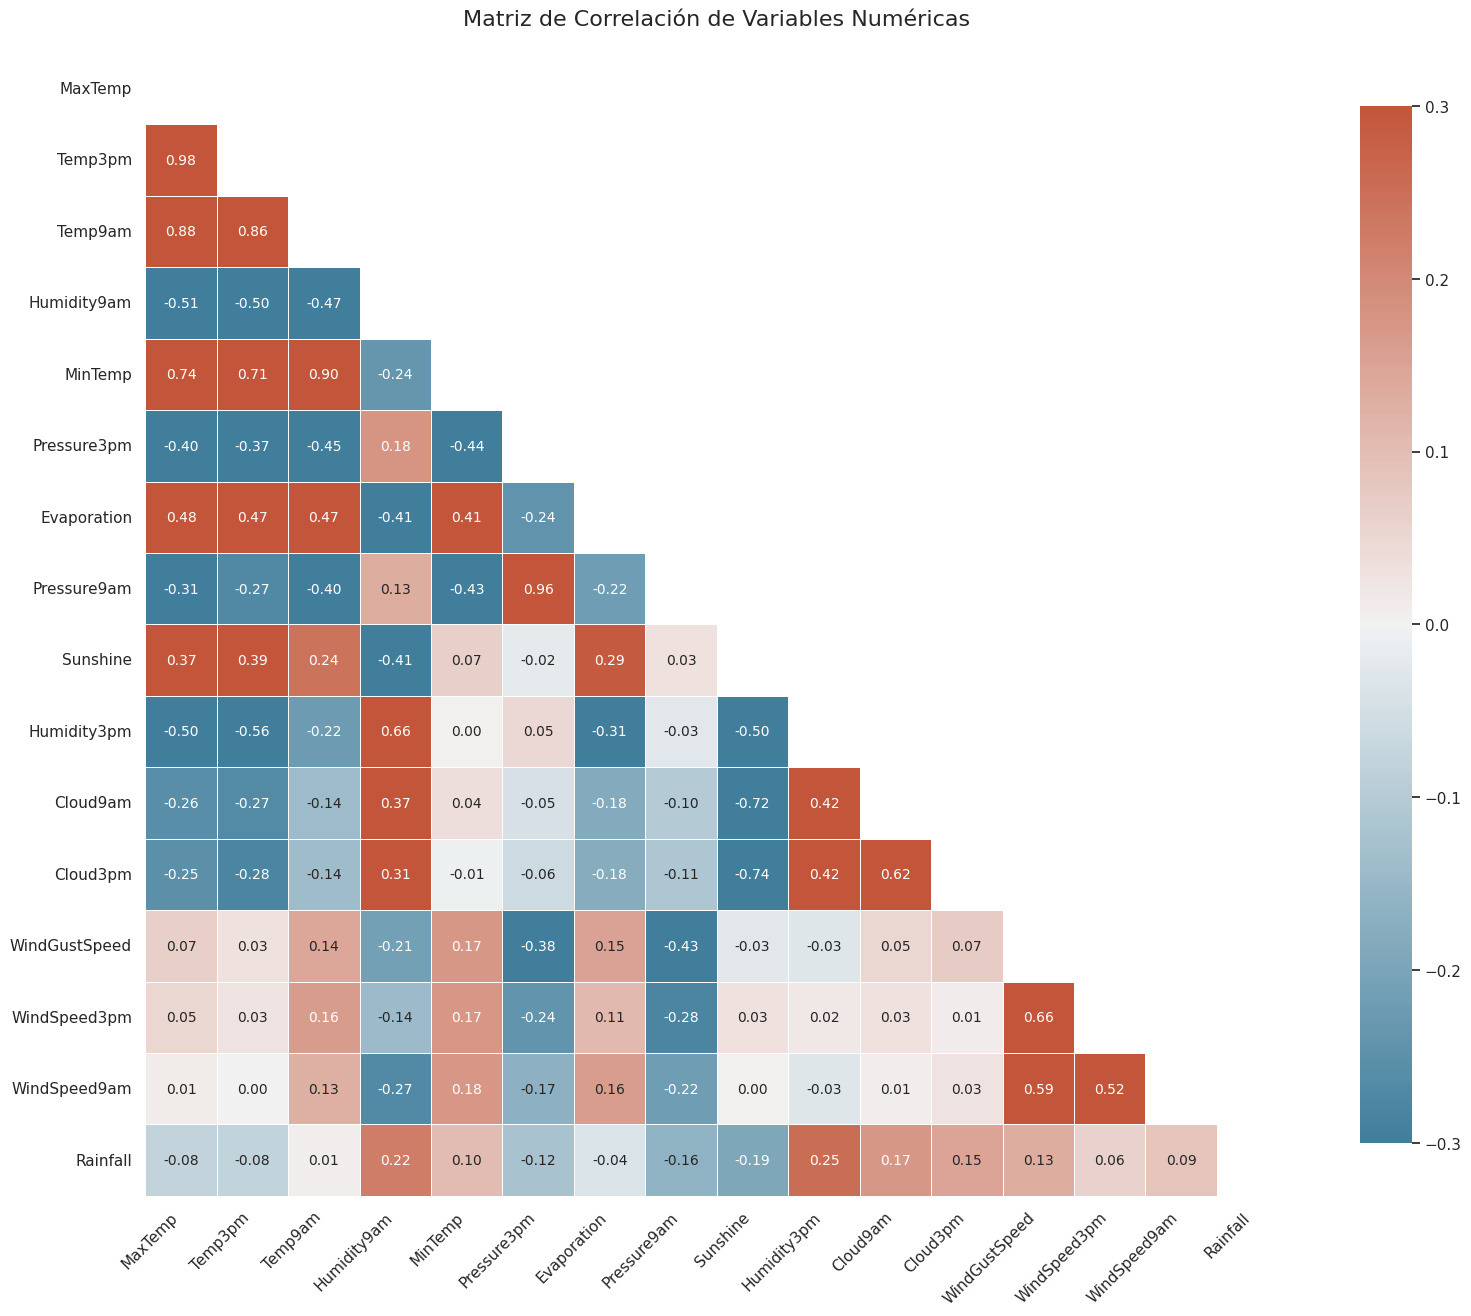

In [ ]:
# Definir las columnas num√©ricas relevantes
numeric_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm'
]

# Calcular la matriz de correlaci√≥n
corr_matrix = X_train_processed[numeric_cols].corr()

# Ordenar las variables por su correlaci√≥n total (opcional, mejora visual)
corr_matrix = corr_matrix.loc[
    corr_matrix.abs().sum().sort_values(ascending=False).index,
    corr_matrix.abs().sum().sort_values(ascending=False).index
]

# Crear la m√°scara para el tri√°ngulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Tama√±o de la figura
plt.figure(figsize=(16, 14))
sns.set_theme(style="white")

# Paleta de colores personalizada
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Heatmap con anotaciones
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=-0.3,
    vmax=0.3,
    center=0,
    square=True,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)

plt.title("Matriz de Correlaci√≥n de Variables Num√©ricas", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Matriz de correlaci√≥n (categ√≥rica)

In [ ]:
# Establecer estilo
sns.set_theme(style="white")

# Seleccionar variables categ√≥ricas dummy
categorical_dummies = [
    'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W',
    'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W',
    'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W'
]

# Calcular matriz de correlaci√≥n
corr_matrix = X_train_processed[categorical_dummies].corr()

# Reordenar columnas para visualizaci√≥n clara
corr_matrix = corr_matrix.loc[
    corr_matrix.abs().sum().sort_values(ascending=False).index,
    corr_matrix.abs().sum().sort_values(ascending=False).index
]

# Crear m√°scara para el tri√°ngulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Tama√±o y figura
plt.figure(figsize=(14, 12))

# Colormap personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=-0.3,
    vmax=0.3,
    center=0,
    square=True,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matriz de Correlaci√≥n de Variables Categ√≥ricas (Dummies)", fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'X_train_processed' is not defined

# Estandarizaci√≥n

Estandarizamos las caracter√≠sticas porque pueden tener diferentes rangos de valores.
Estandarizarlas asegura que todas las caracter√≠sticas tengan la misma escala, lo que evita que las caracter√≠sticas
con mayores rangos dominen el modelo.

In [ ]:
# Crear el estandarizador
scaler = StandardScaler()

## Estandarizaci√≥n de Train

In [ ]:
# Seleccionar las columnas a estandarizar
columns_to_standardize = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
# Aplicar la estandarizaci√≥n a las columnas seleccionadas
X_train_processed[columns_to_standardize] = scaler.fit_transform(X_train_processed[columns_to_standardize])

In [ ]:
X_train_processed

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
21414   0.268654 -0.494312 -0.281224    -0.129293  1.035096      -0.671760   
590    -0.934969 -1.857097  2.324052    -0.346125 -1.433441       1.298921   
79524  -0.544182 -1.590160  0.741408    -1.244429 -2.359936      -0.216988   
104169 -0.215922  0.278401 -0.269050    -0.284173  1.130284      -0.747556   
5385   -1.482070 -0.438115 -0.281224    -0.067341  0.032732      -1.505510   
...          ...       ...       ...          ...       ...            ...   
33578   0.878281  0.629634 -0.281224    -0.067341 -0.583097      -0.216988   
131774  0.346811 -0.086882 -0.281224     0.242419 -0.043699      -0.671760   
48137   0.409337  0.882522  0.863150    -0.346125 -1.433441      -0.747556   
66528  -0.888075 -1.365371 -0.281224    -0.934669 -1.090765       1.071534   
39485  -1.310124 -0.452164 -0.281224    -0.748813 -0.092090      -0.747556   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
21414      -0.113625      0.153564    -0.518974     0.170842  ...          0   
590         1.128967      0.039482     0.691830     1.918660  ...          1   
79524      -0.113625     -0.416848     1.639416     2.355615  ...          1   
104169      0.112301     -0.188683    -0.255756    -0.460315  ...          0   
5385       -0.565476     -1.671756     0.007463    -0.703067  ...          0   
...              ...           ...          ...          ...  ...        ...   
33578       0.112301      1.066224    -0.466330     0.073741  ...          0   
131774     -0.339550      0.039482     0.533899     0.607797  ...          0   
48137      -0.791402     -1.101343     0.270681    -0.266113  ...          1   
66528      -0.565476      1.294389     0.533899     0.899100  ...          0   
39485      -0.565476     -1.443591    -0.571618    -0.800168  ...          0   

        WindGustDir_N  WindGustDir_S  WindGustDir_W  WindDir9am_N  \
21414               0              1              0             0   
590                 1              0              0             1   
79524               0              1              0             0   
104169              0              0              0             1   
5385                0              0              0             0   
...               ...            ...            ...           ...   
33578               1              0              0             1   
131774              0              1              0             0   
48137               1              0              0             0   
66528               0              1              0             0   
39485               0              0              0             0   

        WindDir9am_S  WindDir9am_W  WindDir3pm_N  WindDir3pm_S  WindDir3pm_W  
21414              0             1             0             1             0  
590                0             0             1             0             0  
79524              1             0             0             1             0  
104169             0             0             0             0             1  
5385               1             0             1             0             0  
...              ...           ...           ...           ...           ...  
33578              0             0             0             0             0  
131774             0             0             0             0             0  
48137              1             0             1             0             0  
66528              1             0             0             1             0  
39485              0             0             0             1             0  

[112318 rows x 32 columns]

## Estandarizaci√≥n de Test

In [ ]:
# Seleccionar las columnas a estandarizar
columns_to_standardize = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Aplicar la estandarizaci√≥n a las columnas seleccionadas
X_test_processed[columns_to_standardize] = scaler.transform(X_test_processed[columns_to_standardize])

In [ ]:
X_test_processed

Cloud3pm  Cloud9am  Day  Evaporation  Humidity3pm  Humidity9am  \
78429   1.114730 -0.615150   17     2.100980    -1.042921    -0.624261   
86251  -0.228949 -0.191960   20     0.614131     0.607797    -0.255756   
70801   1.562623  1.500799   13     1.233651    -0.605966    -0.150468   
24206  -0.040704 -0.046079   17    -0.067341     0.510695     1.270911   
25777  -0.040704 -0.046079    5    -0.067341    -0.800168     1.218267   
...          ...       ...  ...          ...          ...          ...   
145052 -0.197428 -0.201756   14     0.490227    -1.722628    -0.518974   
124834 -0.293116 -0.213383    8    -0.191245    -0.557416    -0.782192   
122544  1.562623  0.654419   17     1.357555     0.559246    -0.518974   
31913  -1.572629 -0.191960    3     0.180467     0.122291    -0.782192   
111169 -0.587264 -0.191960   10    -0.315149     0.000915     0.428612   

         Latitude   Longitude   MaxTemp   MinTemp  ...  WindDir9am_N  \
78429  -37.710947  145.083781  1.346149  0.753230  ...             0   
86251  -27.468962  153.023501  0.798226  1.081490  ...             1   
70801  -34.195274  142.150315  0.770127  0.925176  ...             0   
24206  -33.751195  150.694171 -0.114981  0.784492  ...             0   
25777  -33.751195  150.694171  0.713930 -0.606708  ...             1   
...           ...         ...       ...       ...  ...           ...   
145052 -25.345554  131.036961  0.643683 -0.747391  ...             0   
124834 -32.981517  121.644079  0.236253  0.596915  ...             0   
122544 -31.955897  115.860578  0.727979  0.972070  ...             1   
31913  -33.869844  151.208285  0.222203  0.972070  ...             0   
111169 -35.024782  117.883608 -0.438115  0.596915  ...             0   

        WindDir9am_S  WindDir9am_W  WindGustDir_N  WindGustDir_S  \
78429              0             0              1              0   
86251              0             0              1              0   
70801              1             0              0              1   
24206              1             0              0              1   
25777              0             0              0              1   
...              ...           ...            ...            ...   
145052             0             0              1              0   
124834             0             1              0              0   
122544             0             0              0              1   
31913              0             0              0              0   
111169             0             0              0              1   

        WindGustDir_W  WindGustSpeed  WindSpeed3pm  WindSpeed9am  Year  
78429               0      -0.065397      0.381729     -0.565476  2010  
86251               0      -0.520170     -0.645013     -0.791402  2014  
70801               0      -0.899147     -0.873178      0.564152  2010  
24206               0      -0.520170     -0.188683     -0.565476  2009  
25777               0      -1.732896     -1.899921     -1.356216  2013  
...               ...            ...           ...           ...   ...  
145052              0      -1.505510     -1.329508     -0.904365  2016  
124834              1       2.587443      2.092967      2.145632  2011  
122544              0      -0.899147     -0.873178     -0.565476  2013  
31913               0      -0.747556      0.039482     -0.791402  2013  
111169              0      -0.065397     -0.188683     -0.904365  2016  

[28080 rows x 32 columns]

**En el conjunto de entrenamiento:**
Se aplica fit_transform del StandardScaler para ajustar el escalador a los datos de entrenamiento y transformar esos datos.

**En el conjunto de prueba:**
Se aplica transform del StandardScaler ya ajustado para transformar los datos de prueba usando la misma media y desviaci√≥n est√°ndar que en el conjunto de entrenamiento.

Esto asegura una transformaci√≥n consistente y evita la fuga de informaci√≥n.



# Balanceo de datos


Realizamos un balanceo de datos en el conjunto de entrenamiento utilizando la t√©cnica SMOTETomek.

In [ ]:
# Antes de aplicar SMOTETomek, volver a comprobar si hay valores NaN
print("Valores NaN en X_train_processed antes de SMOTETomek:")
print(X_train_processed.isnull().sum())

print("\nValores NaN en y_train antes de SMOTETomek:")
print(y_train.isnull().sum())

Valores NaN en X_train_processed antes de SMOTETomek:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Latitude         0
Longitude        0
Region           0
Year             0
Month            0
Day              0
RainToday        0
WindGustDir_N    0
WindGustDir_S    0
WindGustDir_W    0
WindDir9am_N     0
WindDir9am_S     0
WindDir9am_W     0
WindDir3pm_N     0
WindDir3pm_S     0
WindDir3pm_W     0
dtype: int64

Valores NaN en y_train antes de SMOTETomek:
0


In [ ]:
# Aplicar SMOTETomek solo al conjunto de entrenamiento
smote_tomek = SMOTETomek(random_state=42)

# Asegurarse de que y_train no sea un DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]

# Reemplazar directamente X_train y y_train con los datos balanceados
X_train_processed, y_train = smote_tomek.fit_resample(X_train_processed, y_train)

# El conjunto de prueba se mantiene sin cambios
X_test_processed, y_test = X_test_processed, y_test  # No hacemos nada con X_test ni y_test

# Verificar las formas de los datos balanceados
print("Tama√±o de X_train despu√©s de SMOTETomek:", X_train_processed.shape)
print("Tama√±o de y_train despu√©s de SMOTETomek:", y_train.shape)
print("Tama√±o de X_test (sin cambios):", X_test_processed.shape)
print("Tama√±o de y_test (sin cambios):", y_test.shape)

Tama√±o de X_train despu√©s de SMOTETomek: (173686, 32)
Tama√±o de y_train despu√©s de SMOTETomek: (173686,)
Tama√±o de X_test (sin cambios): (28080, 32)
Tama√±o de y_test (sin cambios): (28080,)


In [ ]:
print("X_train_balanced shape:", X_train_processed.shape)
print("y_train_encoded shape:", y_train.shape)

X_train_balanced shape: (173686, 32)
y_train_encoded shape: (173686,)


In [ ]:
print("\nDistribuci√≥n despu√©s del balanceo:")
print(pd.Series(y_train).value_counts(normalize=True))


Distribuci√≥n despu√©s del balanceo:
RainTomorrow
0    0.5
1    0.5
Name: proportion, dtype: float64


El m√©todo **SMOTETomek** combina **SMOTE**, que genera datos sint√©ticos para la clase minoritaria, con **Tomek Links**, que elimina datos redundantes de la clase mayoritaria. Esto balancea los datos mejorando la representaci√≥n de la clase minoritaria y limpiando el ruido en la mayoritaria.

Se justifica su uso porque:
1. **Maneja desbalance de clases**: Evita que el modelo se sesgue hacia la clase mayoritaria.
2. **Mejora el aprendizaje**: Permite l√≠mites de decisi√≥n m√°s claros y mejor desempe√±o en m√©tricas como sensibilidad y F1-Score.
3. **Generaliza bien**: Los datos balanceados son m√°s representativos para el entrenamiento.

El conjunto de prueba permanece sin cambios para evaluar el modelo con la distribuci√≥n original, asegurando resultados realistas.

# Regresi√≥n log√≠stica

In [ ]:
# Modelo con regularizaci√≥n L2 (por defecto)
model_l2 = LogisticRegression()
model_l2.fit(X_train_processed, y_train)

# Reordenar columnas por si acaso
X_test_processed = X_test_processed[X_train_processed.columns]

y_pred_l2 = model_l2.predict(X_test_processed)
y_proba_l2 = model_l2.predict_proba(X_test_processed)[:, 1]
f1_l2 = f1_score(y_test, y_pred_l2)

print(f"F1-score con regularizaci√≥n L2: {f1_l2:.2f}")

F1-score con regularizaci√≥n L2: 0.60


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Modelo sin regularizaci√≥n

model_none = LogisticRegression(penalty=None, solver='saga', max_iter=2000)
model_none.fit(X_train_processed, y_train)

y_pred_none = model_none.predict(X_test_processed)
y_proba_none = model_none.predict_proba(X_test_processed)[:, 1]
f1_none = f1_score(y_test, y_pred_none)

print(f"F1-score sin regularizaci√≥n: {f1_none:.2f}")

F1-score sin regularizaci√≥n: 0.60


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Comparar y elegir mejor modelo seg√∫n F1-score
if f1_none > f1_l2:
    print("El modelo sin regularizaci√≥n tiene mejor F1-score")
    best_model = model_none
    y_pred = y_pred_none
    y_proba = y_proba_none
else:
    print("El modelo con regularizaci√≥n L2 tiene mejor F1-score")
    best_model = model_l2
    y_pred = y_pred_l2
    y_proba = y_proba_l2

El modelo sin regularizaci√≥n tiene mejor F1-score


In [ ]:
# M√©tricas finales del mejor modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

print("\nM√©tricas del mejor modelo de Regresi√≥n Log√≠stica:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"ROC AUC:   {roc_auc:.2f}")


Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     21793
           1       0.53      0.71      0.60      6287

    accuracy                           0.79     28080
   macro avg       0.72      0.76      0.73     28080
weighted avg       0.82      0.79      0.80     28080


M√©tricas del mejor modelo de Regresi√≥n Log√≠stica:
Accuracy:  0.79
ROC AUC:   0.85


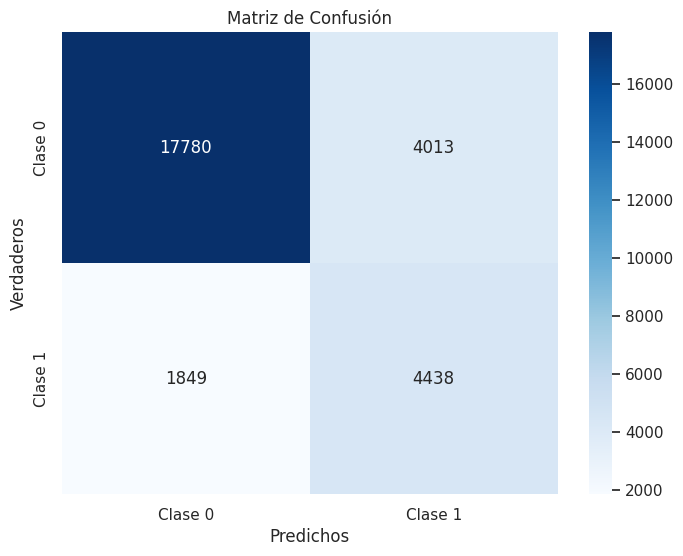

In [ ]:
# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.title('Matriz de Confusi√≥n')
plt.show()

A partir de la matriz de confusi√≥n, podemos observar que el modelo tiende a predecir una mayor cantidad de falsos positivos (3989) que de falsos negativos (1858).

### C√°lculo de la curva ROC

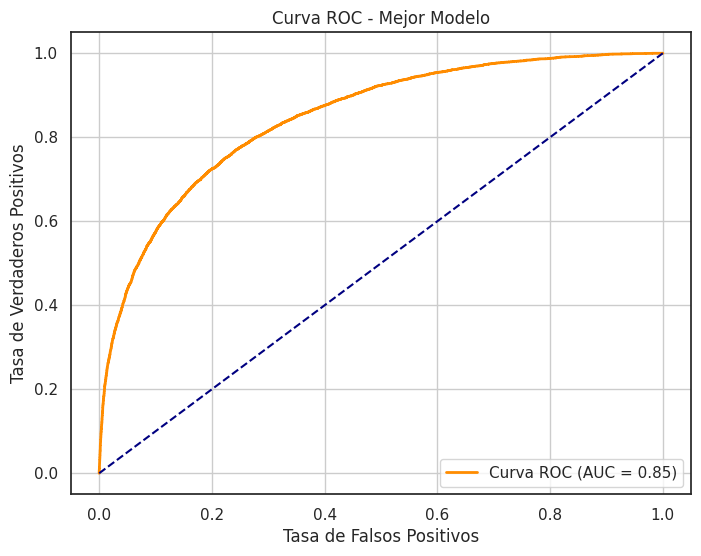

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Mejor Modelo')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Por defecto, el modelo de regresi√≥n log√≠stica utiliza un umbral de 0.5. En este caso, consideramos que ese valor no ser√≠a √≥ptimo ya que nuestro dataset est√° desbalanceado. Para evitar falsos negativos, ser√≠a mejor implementar un umbral m√°s bajo.

Para encontrar el mejor umbral, trataremos de maximizar el F1-score para cada umbral.

In [ ]:
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]

print(f"Mejor umbral seg√∫n F1-score: {best_thresh:.2f} (F1 = {f1_scores[best_idx]:.2f})")

Mejor umbral seg√∫n F1-score: 0.60 (F1 = 0.61)


Un umbral de 0.59 mejora el F1-score a 0.61, lo cual sugiere un mejor equilibrio entre precisi√≥n y recall, y prioriza evitar falsos negativos

# Modelo base

In [ ]:
# Modelo base
model_base = DummyClassifier(strategy='stratified', random_state=42)
model_base.fit(X_train_processed, y_train)

# Predicciones
y_pred_base = model_base.predict(X_test_processed)
y_proba_base = model_base.predict_proba(X_test_processed)[:, 1]

### M√©tricas de evaluaci√≥n

In [ ]:
accuracy = accuracy_score(y_test, y_pred_base)
roc_auc = roc_auc_score(y_test, y_proba_base)
f1_dummy = f1_score(y_test, y_pred_base)

# Reporte
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_base))
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1-score: {f1_dummy:.2f}")


Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.78      0.50      0.61     21793
           1       0.23      0.51      0.31      6287

    accuracy                           0.50     28080
   macro avg       0.50      0.51      0.46     28080
weighted avg       0.66      0.50      0.55     28080

Accuracy: 0.50
ROC AUC: 0.51
F1-score: 0.31


### Matriz de Confusi√≥n + An√°lisis de falsos positivos y negativos

- Falsos negativos (FN) son m√°s graves si no queremos perder casos verdaderamente positivos (en nuestro caso, predecir que no llueve cuando en realidad s√≠ llueve).
- Falsos positivos (FP) pueden implicar revisar manualmente casos que en realidad no lo necesitaban.

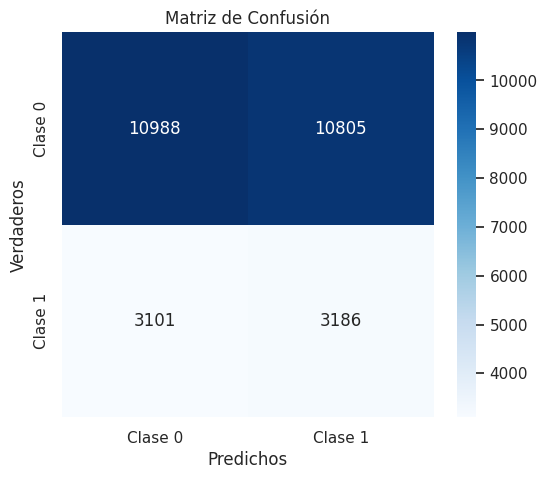

Falsos Positivos: 10805 - El modelo predijo '1' cuando era '0'
Falsos Negativos: 3101 - El modelo predijo '0' cuando era '1'


In [ ]:
# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_base)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.title('Matriz de Confusi√≥n')
plt.show()

# An√°lisis b√°sico
tn, fp, fn, tp = cm.ravel()
print(f"Falsos Positivos: {fp} - El modelo predijo '1' cuando era '0'")
print(f"Falsos Negativos: {fn} - El modelo predijo '0' cuando era '1'")

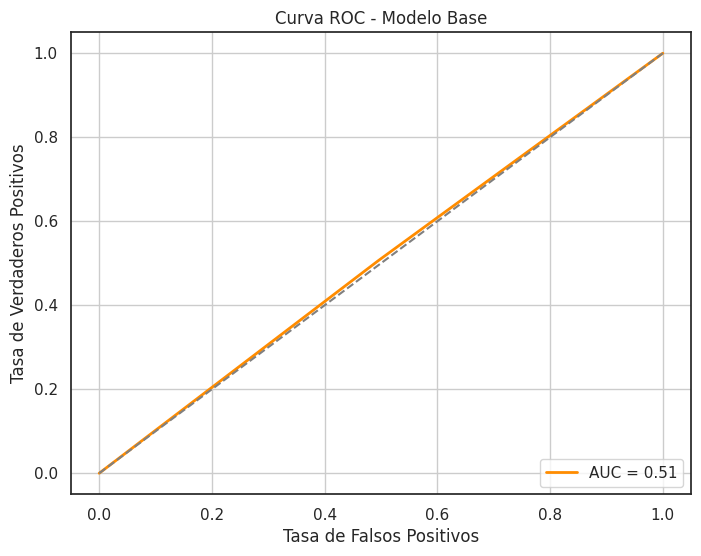

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_base)
roc_auc = roc_auc_score(y_test, y_proba_base)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Modelo Base')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Encontrar el mejor umbral (m√°ximo F1)
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = [f1_score(y_test, (y_proba_base >= t).astype(int)) for t in thresholds]

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Mejor umbral por F1-score: {best_thresh:.2f} (F1 = {best_f1:.2f})")

Mejor umbral por F1-score: 0.00 (F1 = 0.37)


In [ ]:
# Comparaci√≥n de modelos

def evaluar_modelo(nombre, y_true, y_pred, y_proba):
    """
    Funci√≥n para evaluar un modelo.
    :param nombre: Nombre del modelo.
    :param y_true: Etiquetas verdaderas.
    :param y_pred: Etiquetas predichas.
    :param y_proba: Probabilidades de pertenencia a la clase positiva.
    """
    print(f"\n=== {nombre} ===")
    print(classification_report(y_true, y_pred))
    print(f"ROC AUC  :  {roc_auc_score(y_true, y_proba):.2f}")

evaluar_modelo("Modelo Base", y_test, y_pred_base, y_proba_base)
evaluar_modelo("Regresi√≥n Log√≠stica", y_test, y_pred, y_proba)


=== Modelo Base ===
              precision    recall  f1-score   support

           0       0.78      0.50      0.61     21793
           1       0.23      0.51      0.31      6287

    accuracy                           0.50     28080
   macro avg       0.50      0.51      0.46     28080
weighted avg       0.66      0.50      0.55     28080

ROC AUC  :  0.51

=== Regresi√≥n Log√≠stica ===
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     21793
           1       0.53      0.71      0.60      6287

    accuracy                           0.79     28080
   macro avg       0.72      0.76      0.73     28080
weighted avg       0.82      0.79      0.80     28080

ROC AUC  :  0.85


El modelo base alcanza un accuracy del 50% y un ROC AUC de 0.51, indicando que clasifica casi al azar, con un bajo recall para la clase mayoritaria y bajo desempe√±o general.

En cambio, la Regresi√≥n Log√≠stica aumenta el accuracy al 79%, mejora el recall de la clase positiva (70%) y logra un ROC AUC de 0.85, lo que indica una muy buena capacidad de discriminaci√≥n entre clases.

Concluimos que la Regresi√≥n Log√≠stica supera ampliamente al modelo base, siendo mucho m√°s efectiva para identificar correctamente tanto positivos como negativos

# B√∫squeda de hiperpar√°metros


### Random search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'C': loguniform(1e-3, 1e3),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 250, 500],
    'class_weight': ['balanced'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring='f1',
    n_jobs=1,  # üëà sin multiprocessing
    random_state=42,
    verbose=1
)

random_search.fit(X_train_processed, y_train)

print("Mejor resultado - RandomizedSearch:")
print(random_search.best_params_)
print(f"F1 score: {random_search.best_score_:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

Mejor resultado - RandomizedSearch:
{'C': np.float64(51.41096648805744), 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
F1 score: 0.81


In [ ]:
random_model = random_search.best_estimator_

y_pred_random = random_model.predict(X_test_processed)
y_proba_random = random_model.predict_proba(X_test_processed)[:, 1]

print("\n Reporte del mejor modelo (Random Search)")
print(classification_report(y_test, y_pred_random))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_random):.2f}")


 Reporte del mejor modelo (Random Search)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     21793
           1       0.52      0.70      0.60      6287

    accuracy                           0.79     28080
   macro avg       0.71      0.76      0.73     28080
weighted avg       0.82      0.79      0.80     28080

ROC AUC: 0.84


In [ ]:
f1_random_logistic = f1_score(y_test, y_pred_random)
print(f"F1-score del mejor modelo (Random Search): {f1_random_logistic:.2f}")

F1-score del mejor modelo (Random Search): 0.60


# SHAP

### Local

In [ ]:
!pip install shap
import shap

In [ ]:
feature_names=X_train_processed.columns.values

In [ ]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(model_none, X_train_processed, feature_names=feature_names)

# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_processed)

In [ ]:
shap_values.shape

(28080, 32)

In [ ]:
len(y_test),len(feature_names)

(28080, 32)

In [ ]:
index=2

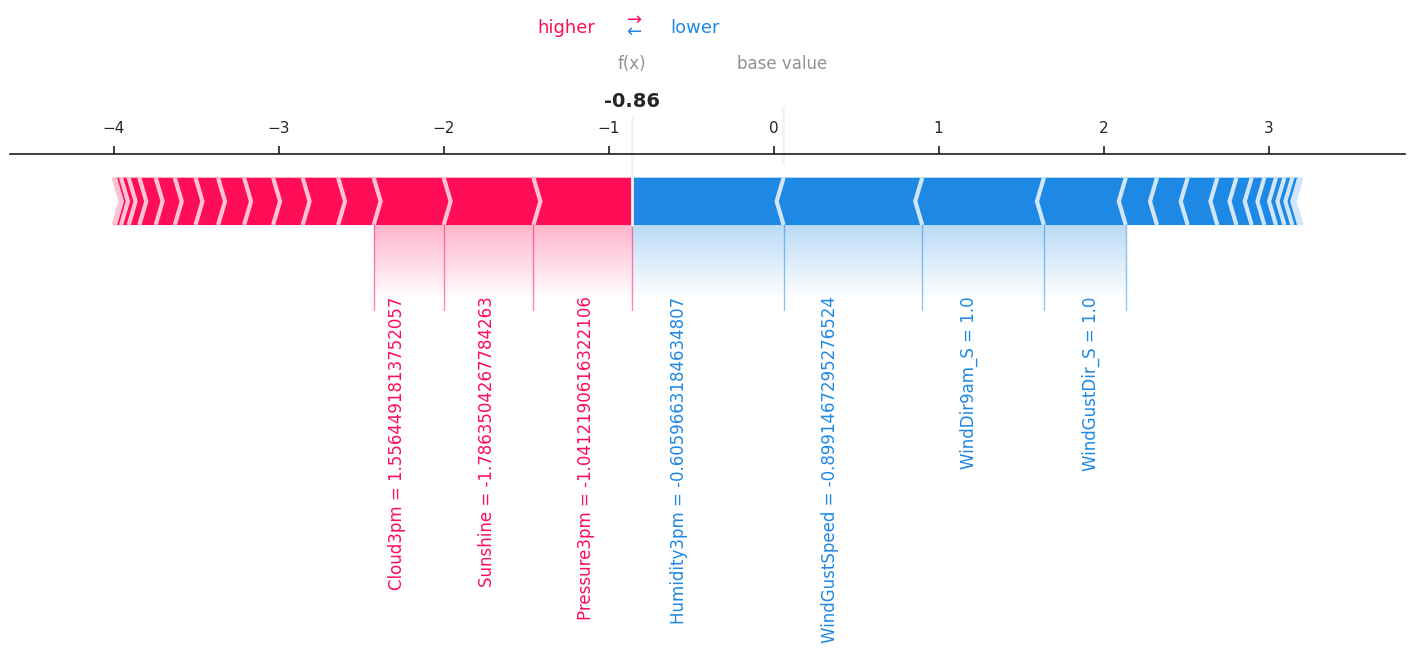

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[index],
                X_test_processed.iloc[index],
                figsize=(18, 4),
                matplotlib=True,
                text_rotation=90)

***Variables que aumentan la predicci√≥n (rojo):***
- **Pressure3pm:** Un bajo valor de presi√≥n atmosf√©rica suele estar asociado a condiciones menos estables
- **Sunshine:** Muy poca cantidad de sol en el d√≠a suele estar asociado con mayor probabilidad de luvia
- **Cloud3pm:** Una alta cobertura de nubes a las 3pm suele indicar condiciones inestables, reforzando la probabilidad de lluvia


***Variables que disminuyen la predicci√≥n (azul):***
- **Humidity3pm:** Un bajo nivel de humedad a las 3pm reduce la probabilidad de lluvia
- **WindGustSpeed:** Las r√°fagas de viento algo intensas podr√≠an indicar condiciones m√°s secas
- **WindDir9pm_S y WindGustDir_S:** La direcci√≥n del viento por la ma√±ana desde el sur y durante el d√≠a est√° asociado a condiciones de poca lluvia

A pesar de que varias variables intentan disminuir la probabilidad de lluvia, el modelo a√∫n asigna una predicci√≥n moderadamente cercana a la clase 1 (lluvia) con f(x) = -0.86, indicando que est√° inclinado hacia no lluvia, pero con influencia importante de condiciones t√≠picas para lluvia (nubosidad, poca luz solar, baja presi√≥n atmosf√©rica)

In [ ]:
explanation = shap.Explanation(values=shap_values[index],
                               base_values=explainer.expected_value,
                               feature_names=feature_names)

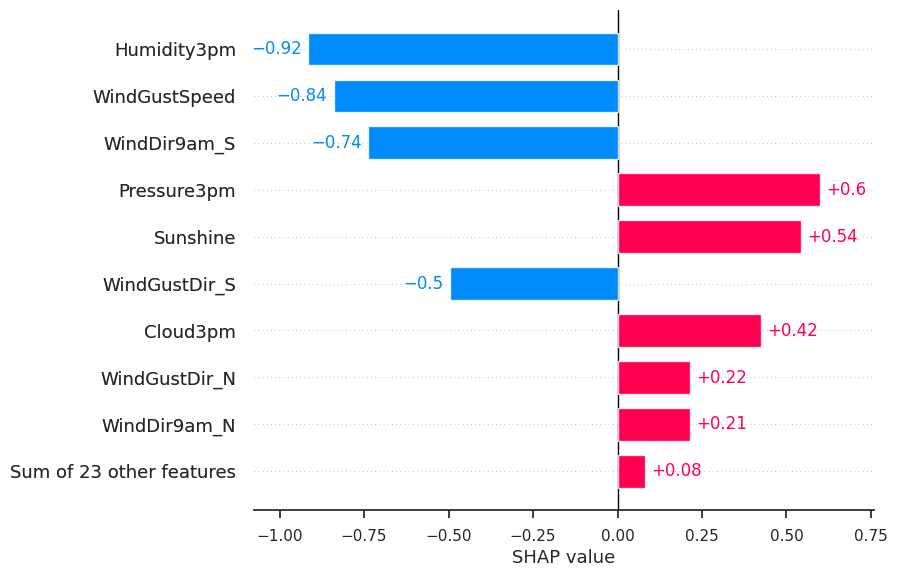

In [ ]:
shap.plots.bar(explanation)

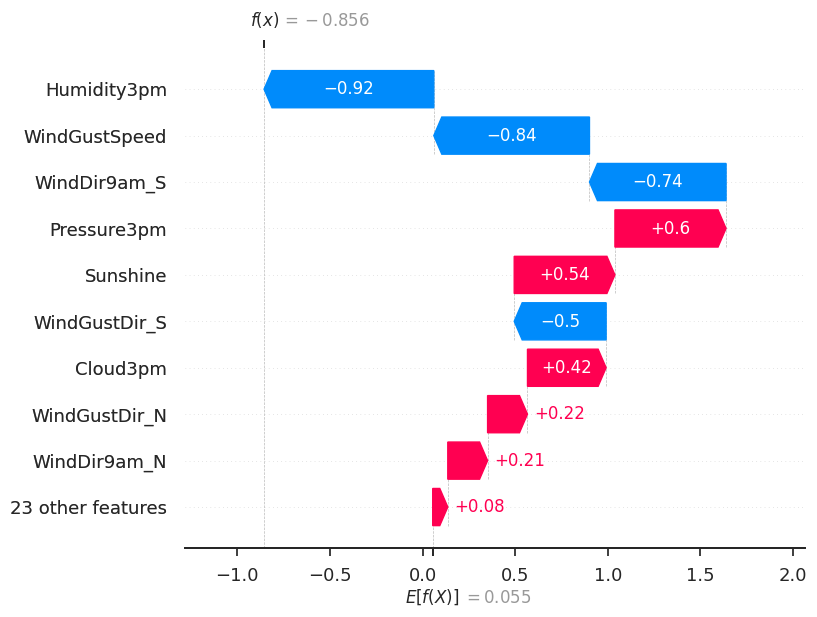

In [ ]:
shap.plots.waterfall(explanation)

Variables que reducen la probabilidad de lluvia (azul):
- Humidity3pm (‚àí0.92): Si la humedad a las 3PM es baja, el modelo predice menos lluvia.
- WindGustSpeed (‚àí0.84): R√°fagas de viento m√°s intensas tienden a asociarse con menos lluvia.
- WindDir9am_S (‚àí0.74): El viento desde el sur a las 9am se asocia con condiciones m√°s secas.
- WindGustDir_S (‚àí0.50): Similar a la anterior, pero para la direcci√≥n del viento con r√°fagas.

Variables que aumentan la probabilidad de lluvia (rojo):
- Pressure3pm (+0.60): Una presi√≥n m√°s baja por la tarde se asocia con condiciones de lluvia.
- Sunshine (+0.54): Los d√≠as con menor cantidad de luz solar aumentan la predicci√≥n de lluvia.
- Cloud3pm (+0.42): Una mayor nubosidad a las 3pm es un fuerte indicador de lluvia.
- WindGustDir_N y WindDir9am_N: El viento desde el norte podr√≠a estar vinculado a masas de aire m√°s h√∫medas.

A partir de estos gr√°ficos, podemos concluir que:
- La variable Humidity3pm es la que tiene un mayor impacto negativo, reduciendo el valor predicho. Esto sugiere que cuando la humedad a las 3pm es baja, el modelo predice menos lluvia
- Pressure3pm es la variable que m√°s contribuy√≥ positivamente, aumentando la predicci√≥n.

### Global

In [ ]:
explanation_global = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test_processed)

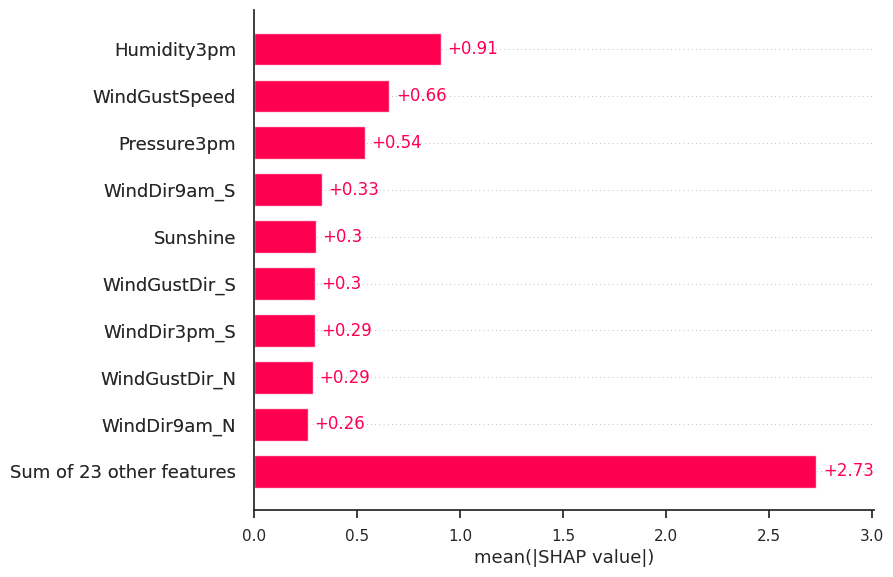

In [ ]:
shap.plots.bar(explanation_global)

Con este gr√°fico, podemos observar la importancia promedio de cada variable en odas las predicciones del modelo. Siendo las siguientes las m√°s destacadas:
- Humidity3pm: es la m√°s influyente, indica que la humedad en la tarde tiene un gran impacto en la predicci√≥n
- WindGustSpeed y Pressure3pm: tambi√©n aportan significativamente al resultado, pero en menor medida que la anterior

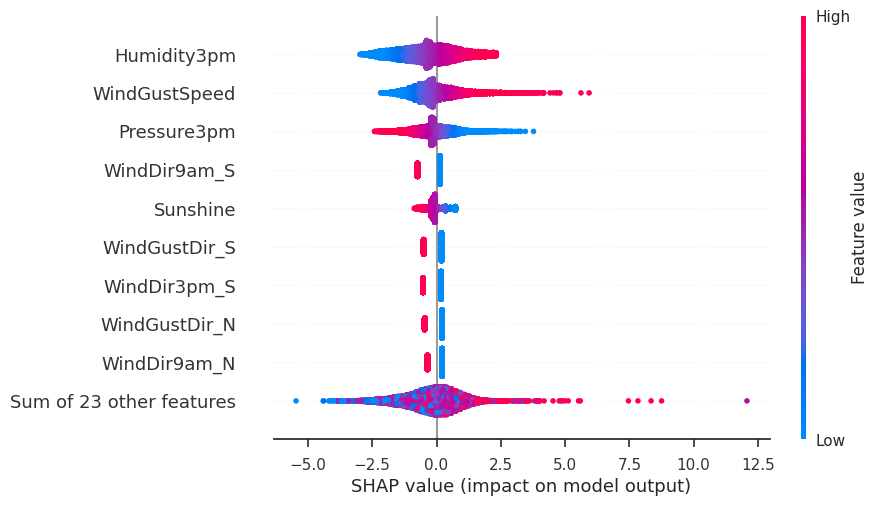

In [ ]:
shap.plots.beeswarm(explanation_global)

Este gr√°fico muestra qu√© tan importantes son las variables y c√≥mo afectan el resultado seg√∫n sus valores.

Observamos los valores altos (en rojo) y los valores bajos (en azul) de cada variable, en donde cada punto representa una observaci√≥n. Tambi√©n verifica los an√°lisis obtenidos de gr√°ficos anteriores.

Podemos decir que el modelo est√° principalmente influenciado por las variables de humedad, viento y presi√≥n.

# Implementaci√≥n de AutoML

Proceso de AutoML con PyCaret para seleccionar el mejor modelo de clasificaci√≥n basado en varias m√©tricas de rendimiento.

**Prop√≥sito del C√≥digo**
- Automatizar el proceso de creaci√≥n y evaluaci√≥n de modelos de clasificaci√≥n.
- Facilitar la elecci√≥n del mejor modelo de acuerdo a m√©tricas como precisi√≥n, F1 Score, y Recall.

Copio el DataFrame con los datos de entrada.


In [ ]:
data_automl  = df.copy()

Configura el entorno para un problema de clasificaci√≥n y define la variable objetivo.

- setup() es la funci√≥n central de PyCaret para inicializar el entorno y configurar el modelo.

In [ ]:
setup(data=data_automl,
      target='RainTomorrow',
      train_size=0.8,
      fix_imbalance=True,
      session_id=123,
      normalize=True)

####Interpretaci√≥n

- Transformaciones realizadas
  - Los datos se expandieron a 72 columnas por el procesamiento
  - Conjunto de entrenamiento: 174.336 filas, 72 columnas
  - Conjunto de prueba: 28.080 filas, 72 columnas
  - El n√∫mero de filas aument√≥ porque se aplic√≥ SMOTE para balancear la clase minoritaria
- Variables (features)
  - 23 variables num√©ricas
  - 3 variables categ√≥ricas
  - 59.8% de las filas ten√≠an valores faltantes

- Preprocesamiento implementado
  - Imputaci√≥n num√©rica: media
  - Imputaci√≥n categ√≥rica: moda
  - Normalizaci√≥n: con z-score (media 0, desviaci√≥n est√°ndar 1)
  - Balanceo de clases: activado con SMOTE (fix_imbalance=True)

- Validaci√≥n cruzada
  - Tipo de validaci√≥n: StratifiedKFold con 10 folds

Eval√∫a autom√°ticamente diferentes modelos de clasificaci√≥n y selecciona el mejor seg√∫n las m√©tricas de rendimiento.

In [ ]:
best_model = compare_models()
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# Extraemos la tabla de resultados
results = pull()

# Nos quedamos con el F1-score del mejor modelo
f1_automl = results.loc[results.index[0], 'F1']  # el √≠ndice es 0 porque toma el F1 Score del modelo que aparece primero en el ranking
print(f"Mejor F1-score (AutoML): {f1_automl}")

Mejor F1-score (AutoML): 0.64


In [ ]:
from pycaret.classification import save_model

save_model(best_model, 'docker_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['MinTemp', 'MaxTemp', 'Rainfall',
                                              'Evaporation', 'Sunshine',
                                              'WindGustSpeed', 'WindSpeed9am',
                                              'WindSpeed3pm', 'Humidity9am',
                                              'Humidity3pm', 'Pressure9am',
                                              'Pressure3pm', 'Cloud9am',
                                              'Cloud3pm', 'Temp9am', 'Temp3pm',
                                              'Latitude', 'Longitude', 'Region',
                                              'Year', 'Mon...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 le

#### Comparaci√≥n de modelos

- **XGBoost (Extreme Gradient Boosting):**
Fue el modelo con mejor desempe√±o general, con una Accuracy de 86.17%, un AUC de 0.8953, y un F1-Score de 0.6520. Logr√≥ el mejor balance entre Precision (0.7467) y Recall (0.5788), lo que lo convierte en una excelente opci√≥n para este problema de clasificaci√≥n binaria.

- **LightGBM y Extra Trees:**
Ambos modelos presentan m√©tricas competitivas. LightGBM obtuvo un Accuracy de 85.80% y un AUC de 0.8905, mientras que Extra Trees alcanz√≥ 85.73% de Accuracy y un AUC de 0.8896. Aunque ligeramente inferiores a XGBoost, ofrecen buenos F1-Scores (0.6410 y 0.6362) y una relaci√≥n razonable entre Precision y Recall

- **Random Forest:**
Tuvo un rendimiento similar al de LightGBM, con un Recall de 0.5895, superior al de XGBoost, aunque con una Precision menor (0.7198). Su F1-Score (0.6481) tambi√©n lo hace un modelo robusto

- **Gradient Boosting Classifier (GBC):**
Tiene el Recall m√°s alto entre los principales modelos (0.6245), aunque su Precision fue m√°s baja (0.6375), con un F1-Score de 0.6309. Sin embargo, su tiempo de entrenamiento fue el m√°s alto (147.5 segundos), lo que puede ser una limitaci√≥n en ciertos casos

- **Modelos m√°s simples:**

	- **Logistic Regression:** Obtuvo una Accuracy de 78.85% y un Recall alto (0.7718), pero 	sacrificando Precision (0.5186). Es √∫til en escenarios donde se prioriza detectar la 	mayor cantidad de positivos (minimizar falsos negativos)

	- **LDA y Ridge Classifier:** Mostraron resultados similares, con Accuracy alrededo del 79% y F1-Scores cerca de 0.62, lo cual es competitivo dado su bajo costo computacional

- **Modelos con menor rendimiento:**

	- **Naive Bayes y QDA** mostraron valores de Accuracy por debajo del 71%, y F1-Scores  entre 0.44 y 0.50, lo que sugiere una baja capacidad predictiva en este contexto

	- **Dummy Classifier** no identific√≥ ning√∫n caso positivo (F1 = 0), y Decision Tree 	obtuvo un AUC muy bajo (0.7054)


#### Conclusi√≥n

A partir de este an√°lisis, podemos concluir que el modelo **XGBoost** se destaca como la mejor opci√≥n para nuestro problema, debido a su gran rendimiento general en todas las m√©tricas importantes. Cabe destacar que otros modelos como Random Forest y LightGBM tambi√©n ofrecen buenos resultados, pero XGBoost proporciona el mejor equilibrio entre precisi√≥n, recall y capacidad predictiva.

### creacion del df de test para MLOPS

In [ ]:
import pandas as pd
from pycaret.classification import load_model, setup, get_config

# Cargar los datos originales del entrenamiento para recrear el entorno
df_train = df.copy()  # Usa tu archivo original si ten√©s acceso
clf1 = setup(data=df_train, target='RainTomorrow', train_size=0.8, fix_imbalance=True, normalize=True, session_id=123)

# Obtener las columnas esperadas
expected_columns = get_config('X_train').columns.tolist()

# Cargar datos de test
df_test = pd.read_csv("TEST.csv")

# Identificar columnas faltantes y sobrantes
faltantes = [col for col in expected_columns if col not in df_test.columns]
sobrantes = [col for col in df_test.columns if col not in expected_columns]

print("‚ùå Columnas faltantes:", faltantes)
print("‚ö†Ô∏è Columnas sobrantes:", sobrantes)

# Agregar columnas faltantes con NaNs
for col in faltantes:
    df_test[col] = pd.NA

# Eliminar columnas sobrantes
df_test = df_test[[col for col in df_test.columns if col in expected_columns]]

# Reordenar las columnas para que coincidan
df_test = df_test[expected_columns]

# Guardar el nuevo archivo
df_test.to_csv("TEST_preparado.csv", index=False)
print("‚úÖ Archivo TEST_preparado.csv listo para la inferencia.")


‚ùå Columnas faltantes: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Latitude', 'Longitude', 'Region', 'Year', 'Month', 'Day', 'RainToday']
‚ö†Ô∏è Columnas sobrantes: ['Date', 'RainfallTomorrow', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes']
‚úÖ Archivo TEST_preparado.csv listo para la inferencia.


# Redes Neuronales

In [ ]:
#  Asegura que y_train e y_test est√©n como enteros
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Dividimos train en train/val
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_processed, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Escalamos de nuevo desde cero (todo lo que se entrena sale del mismo flujo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_test_scaled = scaler.transform(X_test_processed)

# Red Neuronal como clase
class NeuralNetworkClassifier:
    def __init__(self, input_dim, epochs=50, batch_size=32, learning_rate=0.001):
        self.model = Sequential([
            Dense(64, activation='relu', input_shape=(input_dim,)),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
        self.epochs = epochs
        self.batch_size = batch_size

    def train(self, X_train, y_train, X_val, y_val):
        self.history = self.model.fit(X_train, y_train,
                                      validation_data=(X_val, y_val),
                                      epochs=self.epochs,
                                      batch_size=self.batch_size,
                                      verbose=1)

    def evaluate(self, X_test, y_test):
        y_pred_prob = self.model.predict(X_test, verbose=0)
        y_pred = (y_pred_prob > 0.5).astype(int)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("Matriz de Confusi√≥n:")
        print(confusion_matrix(y_test, y_pred))
        print("Reporte de Clasificaci√≥n:")
        print(classification_report(y_test, y_pred))
        return f1

# Entrenamiento y evaluaci√≥n
nn_model = NeuralNetworkClassifier(input_dim=X_train_scaled.shape[1], epochs=50, batch_size=32)
nn_model.train(X_train_scaled, y_train_split, X_val_scaled, y_val)
f1_nn = nn_model.evaluate(X_test_scaled, y_test)


Epoch 1/50
4343/4343 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 3ms/step - accuracy: 0.8161 - loss: 0.3998 - val_accuracy: 0.8466 - val_loss: 0.3511
Epoch 2/50
4343/4343 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 3ms/step - accuracy: 0.8471 - loss: 0.3461 - val_accuracy: 0.8516 - val_loss: 0.3369
Epoch 3/50
4343/4343 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 3ms/step - accuracy: 0.8519 - loss: 0.3345 - val_accuracy: 0.8543 - val_loss: 0.3312
Epoch 4/50
4343/4343 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 3ms/step - accuracy: 0.8570 - loss: 0.3254 - val_accuracy: 0.8584 - val_loss: 0.3245
Epoch 5/50
4343/4343 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 3ms/step - accuracy: 0.8591 - loss: 0.3193 - val_accuracy: 0.8582 - val_loss: 0.3246
Epoch 6/50
4343/4343 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 3ms/step - accuracy: 0.8596 - loss: 0.3156 - val_accuracy: 

# Optimizaci√≥n de hiperpar√°metros




Usamos Optuna para optimizar los hiperpar√°metros de una red neuronal y evaluarla con m√©tricas relevantes.

**Justificaci√≥n del uso de Optuna**
- Optuna es m√°s eficiente que el Grid Search y el Random Search porque utiliza m√©todos adaptativos para buscar en el espacio de hiperpar√°metros. Esto reduce significativamente el tiempo de c√≥mputo y mejora los resultados.

### Optuna

In [ ]:
# Definimos una funci√≥n objetivo para Optuna
def objective(trial):
    # Hiperpar√°metros a optimizar
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    neurons_layer1 = trial.suggest_int('neurons_layer1', 16, 128, step=16)
    neurons_layer2 = trial.suggest_int('neurons_layer2', 8, 64, step=8)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    num_layers = trial.suggest_int('num_layers', 1, 3)

    # Regularizaci√≥n
    l2_reg = trial.suggest_loguniform('l2_reg', 1e-6, 1e-2)  # Regularizaci√≥n L2
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)  # Tasa de Dropout

    # Crear modelo din√°mico seg√∫n los hiperpar√°metros
    model = tf.keras.Sequential()

    # Capa de entrada con regularizaci√≥n L2
    model.add(tf.keras.layers.Dense(neurons_layer1, activation='relu',
                                    input_shape=(X_train.shape[1],),
                                    kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))

    # Agregar capas ocultas con regularizaci√≥n L2 y Dropout
    for _ in range(num_layers - 1):
        model.add(tf.keras.layers.Dense(neurons_layer2, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        if dropout_rate > 0.0:
            model.add(tf.keras.layers.Dropout(dropout_rate))  # Capa Dropout para regularizaci√≥n

    # Capa de salida
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compilaci√≥n del modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Entrenamiento
    X_train_fold, X_valid_fold, y_train_fold, y_valid_fold = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42)

    history = model.fit(X_train_fold, y_train_fold,
                        validation_data=(X_valid_fold, y_valid_fold),
                        epochs=50,  # N√∫mero fijo de √©pocas
                        batch_size=batch_size,
                        verbose=0)

    # Evaluaci√≥n
    _, val_accuracy = model.evaluate(X_valid_fold, y_valid_fold, verbose=0)
    return val_accuracy

# Crear un estudio y optimizar
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Mejor conjunto de hiperpar√°metros
print("Mejores hiperpar√°metros:", study.best_params)
print("Mejor precisi√≥n en validaci√≥n:", study.best_value)


[I 2024-11-28 10:52:08,305] A new study created in memory with name: no-name-d29c3c5e-00e5-4e0c-960b-00f1c9b99cb7
C:\Users\brisa\AppData\Local\Temp\ipykernel_17628\792829932.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
C:\Users\brisa\AppData\Local\Temp\ipykernel_17628\792829932.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-6, 1e-2)  # Regularizaci√≥n L2
C:\Users\brisa\AppData\Local\Temp\ipykernel_17628\792829932.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

Mejores hiperpar√°metros: {'learning_rate': 0.0014320096213793273, 'neurons_layer1': 112, 'neurons_layer2': 64, 'batch_size': 128, 'num_layers': 2, 'l2_reg': 6.5615237491701726e-06, 'dropout_rate': 0.19833507655360078}
Mejor precisi√≥n en validaci√≥n: 0.8599134087562561


### Modelo con los hiperparametros optimizados

Epoch 1/50
208/208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.7598 - loss: 0.4904 - val_accuracy: 0.8070 - val_loss: 0.4182
Epoch 2/50
208/208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4159 - val_accuracy: 0.8111 - val_loss: 0.4079
Epoch 3/50
208/208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8154 - loss: 0.4011 - val_accuracy: 0.8165 - val_loss: 0.3992
Epoch 4/50
208/208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.8260 - loss: 0.3890 - val_accuracy: 0.8229 - val_loss: 0.3906
Epoch 5/50
208/208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.8329 - loss: 0.3779 - val_accuracy: 0.8233 - val_loss: 0.3902
Epoch 6/50
208/208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.8350 - loss: 0.3721 - val_accuracy: 0.8220 - val_loss:

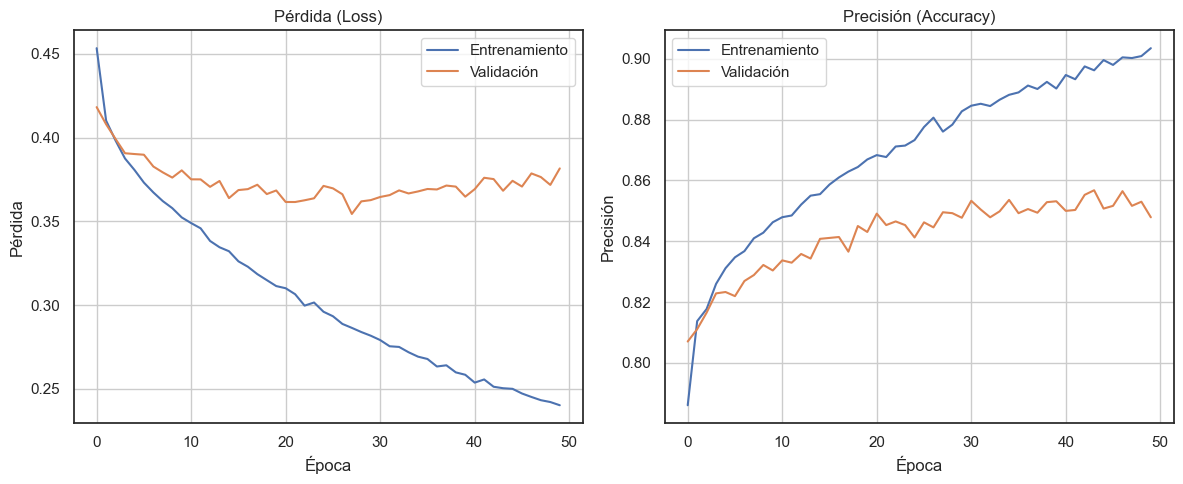

In [ ]:
# Obtener los mejores hiperpar√°metros
best_params = study.best_params

# Crear el modelo final con los mejores hiperpar√°metros
final_model = tf.keras.Sequential()

# Capa de entrada con regularizaci√≥n L2
final_model.add(tf.keras.layers.Dense(
    best_params['neurons_layer1'],
    activation='relu',
    input_shape=(X_train.shape[1],),
    kernel_regularizer=tf.keras.regularizers.l2(best_params['l2_reg'])
))

# Agregar capas ocultas con regularizaci√≥n L2 y Dropout
for _ in range(best_params['num_layers'] - 1):
    final_model.add(tf.keras.layers.Dense(
        best_params['neurons_layer2'],
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(best_params['l2_reg'])
    ))
    if best_params['dropout_rate'] > 0.0:
        final_model.add(tf.keras.layers.Dropout(best_params['dropout_rate']))

# Capa de salida
final_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
final_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo con todos los datos de entrenamiento
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Puedes ajustar este n√∫mero
    batch_size=best_params['batch_size'],
    verbose=1
)

# Evaluar el modelo final en el conjunto de prueba
final_accuracy = final_model.evaluate(X_test, y_test, verbose=1)[1]
print("\n--- Modelo Final ---")
print(f"Precisi√≥n en el conjunto de prueba: {final_accuracy:.4f}")

plt.figure(figsize=(12, 5))

# Gr√°fico de la p√©rdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validaci√≥n')
plt.title('P√©rdida (Loss)')
plt.xlabel('√âpoca')
plt.ylabel('P√©rdida')
plt.legend()
plt.grid(True)

# Gr√°fico de la precisi√≥n
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validaci√≥n')
plt.title('Precisi√≥n (Accuracy)')
plt.xlabel('√âpoca')
plt.ylabel('Precisi√≥n')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_probs = final_model.predict(X_test)  # Predicciones como probabilidades
y_pred = (y_pred_probs > 0.5).astype(int)          # Convertir probabilidades a clases (umbral 0.5)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score en el conjunto de prueba: {f1:.4f}")


174/174 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
F1-score en el conjunto de prueba: 0.6251


### Justificaci√≥n del c√≥digo y de los hiperpar√°metros optimizados




En este c√≥digo, se utiliza **Optuna** para optimizar los hiperpar√°metros de una red neuronal creada con **TensorFlow**. El objetivo es encontrar el conjunto de hiperpar√°metros que maximice la precisi√≥n del modelo en un conjunto de validaci√≥n.

- Hiperpar√°metros optimizados:

1. **learning_rate**: La tasa de aprendizaje controla c√≥mo de grandes son las actualizaciones de los pesos en cada paso del entrenamiento. Un valor adecuado es crucial para la convergencia del modelo sin causar inestabilidad ni un aprendizaje demasiado lento.
   
2. **neurons_layer1 y neurons_layer2**: El n√∫mero de neuronas en las capas ocultas determina la capacidad del modelo para aprender patrones complejos. Si se elige un n√∫mero muy bajo, el modelo ser√° incapaz de aprender adecuadamente, mientras que un n√∫mero muy alto puede llevar a sobreajuste.

3. **batch_size**: El tama√±o del lote afecta la velocidad de entrenamiento y la estabilidad del modelo. Batches peque√±os pueden hacer que el modelo se entrene m√°s r√°pido pero con m√°s ruido en las actualizaciones, mientras que batches grandes son m√°s estables pero m√°s lentos.

4. **num_layers**: El n√∫mero de capas ocultas controla la profundidad del modelo. M√°s capas permiten aprender representaciones m√°s complejas, pero tambi√©n incrementan el riesgo de sobreajuste.

5. **l2_reg**: La regularizaci√≥n L2 ayuda a evitar que los pesos se vuelvan demasiado grandes, lo cual podr√≠a causar sobreajuste. La optimizaci√≥n de este par√°metro ajusta la penalizaci√≥n sobre los pesos grandes.

6. **dropout_rate**: La tasa de Dropout desactiva aleatoriamente algunas neuronas durante el entrenamiento para evitar sobreajuste. Este par√°metro es optimizado para encontrar la tasa de Dropout m√°s efectiva para la generalizaci√≥n del modelo.

Estos hiperpar√°metros son fundamentales para ajustar la complejidad y la capacidad de generalizaci√≥n del modelo, permitiendo que se adapte mejor a los datos sin sobreajustarse a ellos. La optimizaci√≥n mediante **Optuna** facilita la b√∫squeda del mejor conjunto de estos par√°metros.

# Shap Redes


#### Explicabilidad local

In [ ]:
# Funci√≥n de predicci√≥n (necesita devolver una probabilidad)
def predict_fn(X):
    return final_model.predict(X).flatten()

# Background para aproximar las predicciones
X_background = X_train_processed.sample(n=50, random_state=0)

# Subconjunto a explicar
X_explain = X_test_processed.iloc[:10]

# Crear el explainer
explainer = shap.KernelExplainer(predict_fn, X_background)

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
3300/3300 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 74ms/step
3300/3300 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step
3300/3300 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 67ms/step
3300/3300 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step
3300/3300 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 92ms/step
3300/3300 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 1ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

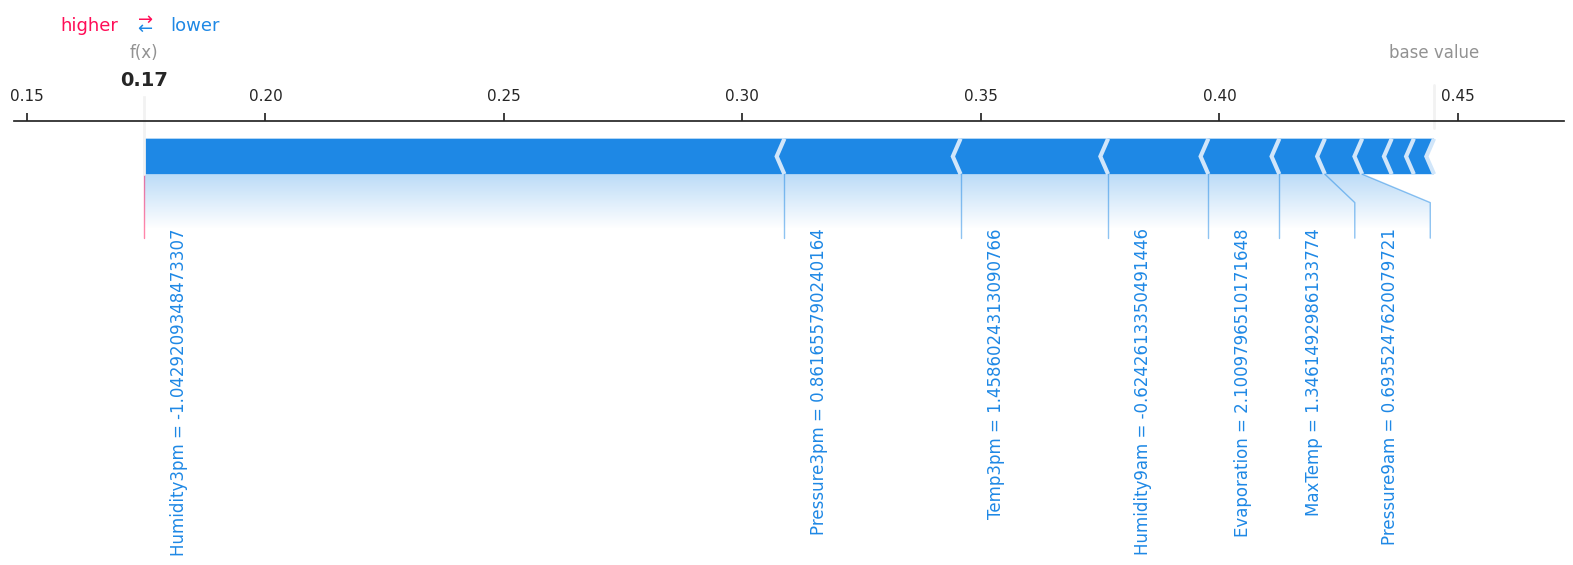

In [ ]:
# Calcular valores SHAP
shap_values = explainer.shap_values(X_explain)

# Inicia entorno JS para visualizaciones
shap.initjs()

# Explicaci√≥n local para la primera observaci√≥n
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_explain.iloc[0],
    matplotlib=True,
    text_rotation=90
)

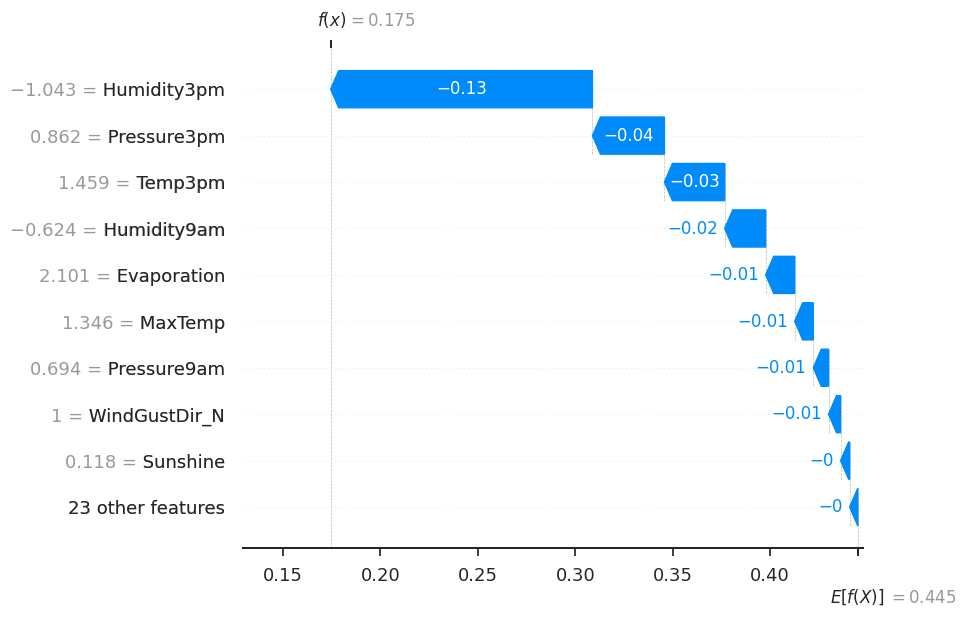

In [ ]:
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_explain.iloc[0]))

#### Explicabilidad global


PermutationExplainer explainer: 28081it [47:33,  9.84it/s]                           


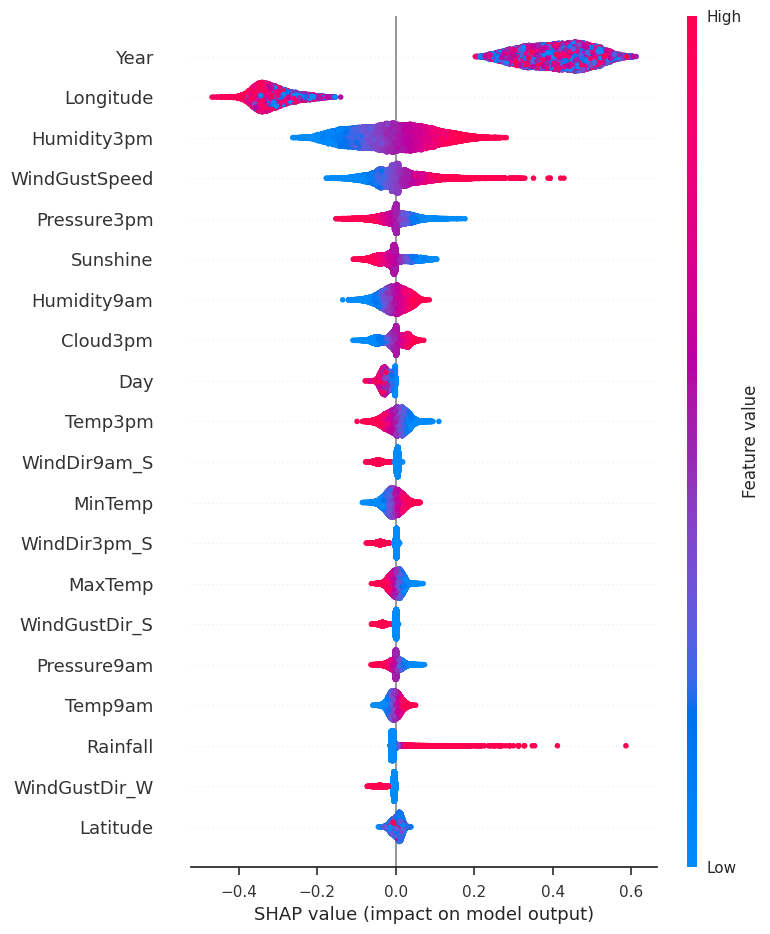

In [ ]:
# Crear un explicador SHAP para el modelo
explainer = shap.Explainer(final_model, X_train_scaled)

# Calcular los valores SHAP para los datos de prueba
shap_values = explainer(X_test_processed)

# Visualizar los valores SHAP
shap.summary_plot(shap_values, X_test_processed)

Type of shap_values: <class 'shap._explanation.Explanation'>


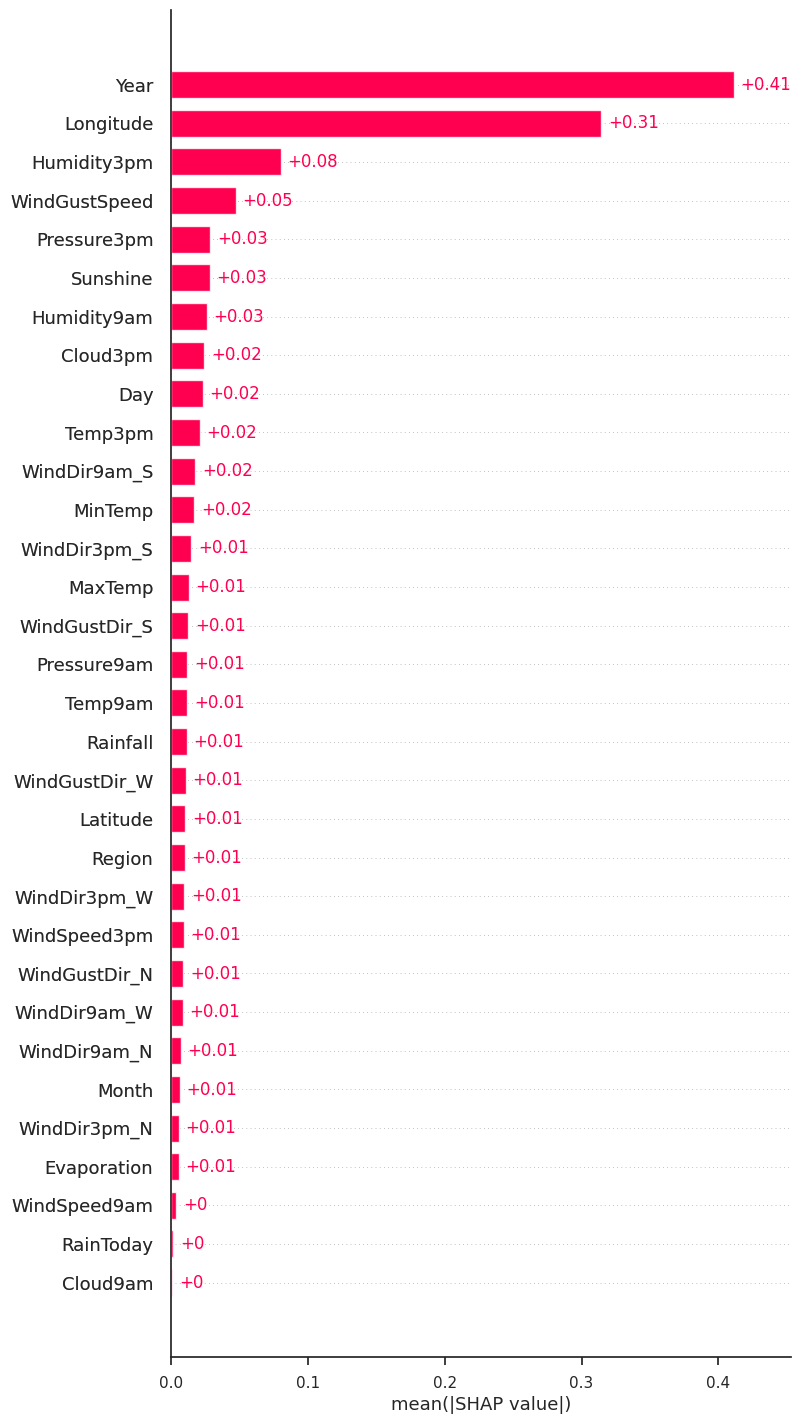

In [ ]:
# Verificar el tipo de datos de shap_values
print("Type of shap_values:", type(shap_values))

# Crear la explicaci√≥n para las importancias de las caracter√≠sticas globales
feature_names = X_test_processed.columns  
explanation = shap.Explanation(values=shap_values.values, base_values=shap_values.base_values, data=X_test_processed, feature_names=feature_names)

# Inicializar JS para gr√°ficos interactivos 
shap.initjs()

# Visualizar la explicaci√≥n de las importancias de las caracter√≠sticas 
shap.plots.bar(explanation, max_display=len(feature_names))

# Mostrar el gr√°fico
plt.show()

# Comparaci√≥n de modelos




 |Modelo/T√©cnica                  | F1 Score
|----------------|----------|
|NN  |                           0.0.63|
|AutoML      |                   0.652000|
|Best NN       |                 0.6251|
|Logistic (sin regularizaci√≥n)|  0.602421|
|Logistic (L2)      |            0.601673|
|Logistic optimizada   |         0.597690|
|Base (Dummy)           |        0.314232|



###  Conclusi√≥n Final

En este trabajo se compararon distintos enfoques para resolver una tarea de clasificaci√≥n, evaluando su rendimiento en funci√≥n del F1 Score. Entre todas las t√©cnicas exploradas, el proceso automatizado de AutoML se destac√≥ como el m√°s efectivo, alcanzando un F1 Score de 0.652, superando tanto a las redes neuronales como a los modelos de regresi√≥n log√≠stica, incluso cuando estos √∫ltimos fueron regularizados y optimizados.

Si bien se entrenaron redes neuronales y se buscaron sus mejores configuraciones, los resultados obtenidos (F1 Score de 0.630 para la versi√≥n base y 0.6251 para la versi√≥n ajustada) no lograron superar al modelo generado autom√°ticamente por AutoML. Esto sugiere que, para este problema en particular, los algoritmos y combinaciones evaluadas por AutoML lograron una mayor capacidad de generalizaci√≥n sin necesidad de ajustes manuales extensivos.

Por su parte, los modelos de regresi√≥n log√≠stica obtuvieron desempe√±os similares entre s√≠ (F1 Scores entre 0.597 y 0.602), y superaron al modelo base (Dummy, con F1 Score de 0.314), aunque sin alcanzar niveles competitivos en comparaci√≥n con AutoML o redes neuronales.

En resumen, los resultados justifican la decisi√≥n de implementar el modelo seleccionado por AutoML en producci√≥n, ya que no solo ofreci√≥ el mejor rendimiento, sino que tambi√©n redujo significativamente el tiempo de experimentaci√≥n, haciendo m√°s eficiente el pipeline de desarrollo. Este modelo ser√° empaquetado mediante Docker y desplegado siguiendo pr√°cticas de MLOps para asegurar su reproducibilidad y escalabilidad.

Esto demuestra que, con las herramientas adecuadas, es posible alcanzar soluciones de alto rendimiento sin sacrificar eficiencia ni calidad en el proceso de desarrollo, marcando un camino claro hacia la automatizaci√≥n inteligente en proyectos de ciencia de datos.
